In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_columns = 999

In [2]:
# transform any feature with skewness greater than 1 except the latitude and longitude
def log_tran(df,except_col=[]):
    transformed_col=[]
    for col in df.columns:
        if (df[col].skew() > 1) and (col not in except_col):
            df[col] = np.log(df[col])
            df.rename({col:'ln_{}'.format(col)},axis=1,inplace=True)
            transformed_col.append(col)
    return df,transformed_col

def inv_log_tran(df):
    for col in df.columns:
        if col[:2] == 'ln':
            df[col] = np.e**(df[col])
            df.rename({col:col[3:]},axis=1,inplace=True)
    return df

def cor_col(df):
    
    threshold = 0.8
    
    # Absolute value correlation matrix
    corr_matrix = df.corr().abs()
    
    # Upper triangle of correlations
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Select columns with correlations above threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    return to_drop

In [13]:
clustered_df = pd.read_csv('../files/cluster_df.csv')
clustered_df_log,log_tran_col = log_tran(clustered_df.copy(),['Total Traffic Volume (MB)','cluster_id'])
clustered_df_log.head()

,ln_Number of Subscribers,ln_Average DL Throughput (kbit/s),Average UL Throughput (kbit/s),ln_DL IBLER (%),ln_UL IBLER (%),DL MCS (only for Initial Transmission),UL MCS (only for Initial Transmission),ln_UL Spectrum Efficiency (bps/HZ),RSRP(All MRs) (dBm),ln_MR Count,Total Traffic Volume (MB),cluster_id
0,3.258097,8.668722,1023.061,2.604170,3.148882,8.0,17.0,-1.427116,-115.06,5.313206,67.130,0
1,3.912023,8.508687,1409.271,2.730464,3.065725,8.0,15.0,-1.171183,-114.87,6.416732,218.492,0
2,3.044522,8.615236,1471.403,2.679651,3.360723,7.0,16.0,-1.272966,-114.08,5.429346,109.247,0
3,0.693147,8.216814,865.221,2.989211,2.311545,5.0,16.0,-2.207275,-113.83,4.795791,3.864,0
4,3.610918,8.487582,1314.256,2.632608,3.216473,7.0,12.0,-1.347074,-113.01,5.981414,144.107,0


In [4]:
df0 = clustered_df_log[clustered_df_log['cluster_id']==0].reset_index(drop=True).drop('cluster_id',axis=1)
df1 = clustered_df_log[clustered_df_log['cluster_id']==1].reset_index(drop=True).drop('cluster_id',axis=1)
df2 = clustered_df_log[clustered_df_log['cluster_id']==2].reset_index(drop=True).drop('cluster_id',axis=1)
df3 = clustered_df_log[clustered_df_log['cluster_id']==3].reset_index(drop=True).drop('cluster_id',axis=1)
df4 = clustered_df_log[clustered_df_log['cluster_id']==4].reset_index(drop=True).drop('cluster_id',axis=1)
df5 = clustered_df_log[clustered_df_log['cluster_id']==5].reset_index(drop=True).drop('cluster_id',axis=1)
df6 = clustered_df_log[clustered_df_log['cluster_id']==6].reset_index(drop=True).drop('cluster_id',axis=1)

In [5]:
df0.to_csv('df_cluster_0.csv',index=False)
df1.to_csv('df_cluster_1.csv',index=False)
df2.to_csv('df_cluster_2.csv',index=False)
df3.to_csv('df_cluster_3.csv',index=False)
df4.to_csv('df_cluster_4.csv',index=False)
df5.to_csv('df_cluster_5.csv',index=False)
df6.to_csv('df_cluster_6.csv',index=False)

In [4]:
#df0 = pd.read_csv('df_cluster_0.csv')
df1 = pd.read_csv('../files/df_cluster_1.csv')
#df2 = pd.read_csv('df_cluster_2.csv')
#df3 = pd.read_csv('df_cluster_3.csv')
#df4 = pd.read_csv('df_cluster_4.csv')
#df5 = pd.read_csv('df_cluster_5.csv')
#df6 = pd.read_csv('df_cluster_6.csv')

In [5]:
# train cluster id 1

# split train test data
from sklearn.cross_validation import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler
X1 = df1.iloc[:,:-1].values
y1 = df1.iloc[:,-1].values
scX1 = StandardScaler()
scy1 = StandardScaler()
X1 = scX1.fit_transform(X1)
y1 = scy1.fit_transform(y1.reshape(-1,1))

# split data
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3, random_state=42)

/Users/witchapong/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Try different algorithm for regression

In [6]:
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# usig XGB

first trial wo hyper parameter tuning

In [14]:
# using XGB
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [8]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2000,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1.7817)

In [51]:
model_xgb.fit(X1_train,y1_train,verbose=False)
y1_pred = model_xgb.predict(X1_test)

In [52]:
r2_score(y1_test,y1_pred)

0.6731292770040569

tuning hyper parameter

In [42]:
model_xgb = xgb.XGBRegressor(
    gamma=0.05,
    learning_rate=0.05,
    n_estimators=2000,
    reg_alpha=0.4640,
    reg_lambda=0.8571,
    silent=1,
    random_state =27,
    nthread = -1.7817)

In [43]:
params = {'min_child_weight':[1.5,1.75],'max_depth':[3,5],'subsample':[0.5,0.75],'colsample_bytree':\
         [0.5,0.75]}

fit_params={'early_stopping_rounds':5, 
            'eval_metric' : 'rmse', 
            'eval_set' : [[X1_test, y1_test]]}

In [44]:
model = GridSearchCV(model_xgb,params,cv=5,fit_params=fit_params)

In [45]:
model.fit(X1_train,y1_train)

[0]	validation_0-rmse:1.0628
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:1.02953
[2]	validation_0-rmse:1.01525
[3]	validation_0-rmse:0.984153
[4]	validation_0-rmse:0.973377
[5]	validation_0-rmse:0.946047
[6]	validation_0-rmse:0.938053
[7]	validation_0-rmse:0.929475
[8]	validation_0-rmse:0.920954
[9]	validation_0-rmse:0.912185
[10]	validation_0-rmse:0.904228
[11]	validation_0-rmse:0.89821
[12]	validation_0-rmse:0.892366
[13]	validation_0-rmse:0.870642
[14]	validation_0-rmse:0.850867


/Users/witchapong/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:584: DeprecationWarning: "fit_params" as a constructor argument was deprecated in version 0.19 and will be removed in version 0.21. Pass fit parameters to the "fit" method instead.
  '"fit" method instead.', DeprecationWarning)


[15]	validation_0-rmse:0.846159
[16]	validation_0-rmse:0.827302
[17]	validation_0-rmse:0.823298
[18]	validation_0-rmse:0.819519
[19]	validation_0-rmse:0.815747
[20]	validation_0-rmse:0.812564
[21]	validation_0-rmse:0.796192
[22]	validation_0-rmse:0.793714
[23]	validation_0-rmse:0.79122
[24]	validation_0-rmse:0.777661
[25]	validation_0-rmse:0.764307
[26]	validation_0-rmse:0.762074
[27]	validation_0-rmse:0.750663
[28]	validation_0-rmse:0.739804
[29]	validation_0-rmse:0.73019
[30]	validation_0-rmse:0.719624
[31]	validation_0-rmse:0.71808
[32]	validation_0-rmse:0.709722
[33]	validation_0-rmse:0.708449
[34]	validation_0-rmse:0.706993
[35]	validation_0-rmse:0.706158
[36]	validation_0-rmse:0.705517
[37]	validation_0-rmse:0.705135
[38]	validation_0-rmse:0.698255
[39]	validation_0-rmse:0.691221
[40]	validation_0-rmse:0.690296
[41]	validation_0-rmse:0.683455
[42]	validation_0-rmse:0.682743
[43]	validation_0-rmse:0.675595
[44]	validation_0-rmse:0.669928
[45]	validation_0-rmse:0.664269
[46]	valida

[42]	validation_0-rmse:0.678137
[43]	validation_0-rmse:0.672065
[44]	validation_0-rmse:0.665509
[45]	validation_0-rmse:0.659839
[46]	validation_0-rmse:0.654848
[47]	validation_0-rmse:0.650613
[48]	validation_0-rmse:0.650275
[49]	validation_0-rmse:0.645665
[50]	validation_0-rmse:0.645216
[51]	validation_0-rmse:0.641934
[52]	validation_0-rmse:0.64111
[53]	validation_0-rmse:0.640613
[54]	validation_0-rmse:0.640828
[55]	validation_0-rmse:0.640149
[56]	validation_0-rmse:0.636683
[57]	validation_0-rmse:0.633421
[58]	validation_0-rmse:0.633017
[59]	validation_0-rmse:0.630175
[60]	validation_0-rmse:0.630001
[61]	validation_0-rmse:0.629781
[62]	validation_0-rmse:0.629462
[63]	validation_0-rmse:0.629155
[64]	validation_0-rmse:0.628915
[65]	validation_0-rmse:0.628563
[66]	validation_0-rmse:0.626534
[67]	validation_0-rmse:0.623538
[68]	validation_0-rmse:0.621752
[69]	validation_0-rmse:0.619294
[70]	validation_0-rmse:0.618953
[71]	validation_0-rmse:0.618763
[72]	validation_0-rmse:0.618714
[73]	vali

[120]	validation_0-rmse:0.583622
[121]	validation_0-rmse:0.583492
[122]	validation_0-rmse:0.583264
[123]	validation_0-rmse:0.583108
[124]	validation_0-rmse:0.58312
[125]	validation_0-rmse:0.582695
[126]	validation_0-rmse:0.582505
[127]	validation_0-rmse:0.582569
[128]	validation_0-rmse:0.582319
[129]	validation_0-rmse:0.582209
[130]	validation_0-rmse:0.581973
[131]	validation_0-rmse:0.581728
[132]	validation_0-rmse:0.581615
[133]	validation_0-rmse:0.581586
[134]	validation_0-rmse:0.581444
[135]	validation_0-rmse:0.581301
[136]	validation_0-rmse:0.580996
[137]	validation_0-rmse:0.580442
[138]	validation_0-rmse:0.580251
[139]	validation_0-rmse:0.58015
[140]	validation_0-rmse:0.579807
[141]	validation_0-rmse:0.579656
[142]	validation_0-rmse:0.579356
[143]	validation_0-rmse:0.579401
[144]	validation_0-rmse:0.579243
[145]	validation_0-rmse:0.579194
[146]	validation_0-rmse:0.578978
[147]	validation_0-rmse:0.578842
[148]	validation_0-rmse:0.578714
[149]	validation_0-rmse:0.578601
[150]	valida

[196]	validation_0-rmse:0.562427
[197]	validation_0-rmse:0.562374
[198]	validation_0-rmse:0.562366
[199]	validation_0-rmse:0.562283
[200]	validation_0-rmse:0.562217
[201]	validation_0-rmse:0.562079
[202]	validation_0-rmse:0.561968
[203]	validation_0-rmse:0.561946
[204]	validation_0-rmse:0.561891
[205]	validation_0-rmse:0.561601
[206]	validation_0-rmse:0.561576
[207]	validation_0-rmse:0.561496
[208]	validation_0-rmse:0.561449
[209]	validation_0-rmse:0.561336
[210]	validation_0-rmse:0.561243
[211]	validation_0-rmse:0.561197
[212]	validation_0-rmse:0.561099
[213]	validation_0-rmse:0.560985
[214]	validation_0-rmse:0.560907
[215]	validation_0-rmse:0.560975
[216]	validation_0-rmse:0.560888
[217]	validation_0-rmse:0.560936
[218]	validation_0-rmse:0.560839
[219]	validation_0-rmse:0.56081
[220]	validation_0-rmse:0.560813
[221]	validation_0-rmse:0.560704
[222]	validation_0-rmse:0.560609
[223]	validation_0-rmse:0.560545
[224]	validation_0-rmse:0.560476
[225]	validation_0-rmse:0.560431
[226]	valid

[195]	validation_0-rmse:0.564829
[196]	validation_0-rmse:0.564966
[197]	validation_0-rmse:0.56497
[198]	validation_0-rmse:0.564926
[199]	validation_0-rmse:0.5648
[200]	validation_0-rmse:0.564605
[201]	validation_0-rmse:0.564272
[202]	validation_0-rmse:0.56427
[203]	validation_0-rmse:0.5644
[204]	validation_0-rmse:0.56475
[205]	validation_0-rmse:0.564524
[206]	validation_0-rmse:0.564408
[207]	validation_0-rmse:0.564305
Stopping. Best iteration:
[202]	validation_0-rmse:0.56427

[0]	validation_0-rmse:1.06247
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:1.0291
[2]	validation_0-rmse:1.01497
[3]	validation_0-rmse:0.984707
[4]	validation_0-rmse:0.973686
[5]	validation_0-rmse:0.946803
[6]	validation_0-rmse:0.938772
[7]	validation_0-rmse:0.930196
[8]	validation_0-rmse:0.921653
[9]	validation_0-rmse:0.91319
[10]	validation_0-rmse:0.905457
[11]	validation_0-rmse:0.899603
[12]	validation_0-rmse:0.893661
[13]	validation_0-rmse:0.872296
[14]	validation_0-rmse

[237]	validation_0-rmse:0.572833
[238]	validation_0-rmse:0.5728
[239]	validation_0-rmse:0.572644
[240]	validation_0-rmse:0.572592
[241]	validation_0-rmse:0.572544
[242]	validation_0-rmse:0.572412
[243]	validation_0-rmse:0.572345
[244]	validation_0-rmse:0.572357
[245]	validation_0-rmse:0.572262
[246]	validation_0-rmse:0.572178
[247]	validation_0-rmse:0.572008
[248]	validation_0-rmse:0.572006
[249]	validation_0-rmse:0.572014
[250]	validation_0-rmse:0.57206
[251]	validation_0-rmse:0.571963
[252]	validation_0-rmse:0.571978
[253]	validation_0-rmse:0.572029
[254]	validation_0-rmse:0.572014
[255]	validation_0-rmse:0.571716
[256]	validation_0-rmse:0.571786
[257]	validation_0-rmse:0.571724
[258]	validation_0-rmse:0.571797
[259]	validation_0-rmse:0.571898
[260]	validation_0-rmse:0.571889
Stopping. Best iteration:
[255]	validation_0-rmse:0.571716

[0]	validation_0-rmse:1.06194
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:1.02766
[2]	validation_0-rmse:1.013

[225]	validation_0-rmse:0.568268
[226]	validation_0-rmse:0.568274
[227]	validation_0-rmse:0.568167
[228]	validation_0-rmse:0.56809
[229]	validation_0-rmse:0.568119
[230]	validation_0-rmse:0.56798
[231]	validation_0-rmse:0.568
[232]	validation_0-rmse:0.56794
[233]	validation_0-rmse:0.567892
[234]	validation_0-rmse:0.567696
[235]	validation_0-rmse:0.567675
[236]	validation_0-rmse:0.567531
[237]	validation_0-rmse:0.567595
[238]	validation_0-rmse:0.567642
[239]	validation_0-rmse:0.567456
[240]	validation_0-rmse:0.567382
[241]	validation_0-rmse:0.567464
[242]	validation_0-rmse:0.567402
[243]	validation_0-rmse:0.567354
[244]	validation_0-rmse:0.567236
[245]	validation_0-rmse:0.567147
[246]	validation_0-rmse:0.567079
[247]	validation_0-rmse:0.566783
[248]	validation_0-rmse:0.566624
[249]	validation_0-rmse:0.566661
[250]	validation_0-rmse:0.566648
[251]	validation_0-rmse:0.566462
[252]	validation_0-rmse:0.566414
[253]	validation_0-rmse:0.566432
[254]	validation_0-rmse:0.566385
[255]	validation

[214]	validation_0-rmse:0.570088
[215]	validation_0-rmse:0.570022
[216]	validation_0-rmse:0.56997
[217]	validation_0-rmse:0.569824
[218]	validation_0-rmse:0.569646
[219]	validation_0-rmse:0.569743
[220]	validation_0-rmse:0.569543
[221]	validation_0-rmse:0.569457
[222]	validation_0-rmse:0.569326
[223]	validation_0-rmse:0.569317
[224]	validation_0-rmse:0.569249
[225]	validation_0-rmse:0.569199
[226]	validation_0-rmse:0.569157
[227]	validation_0-rmse:0.569104
[228]	validation_0-rmse:0.568996
[229]	validation_0-rmse:0.569094
[230]	validation_0-rmse:0.568791
[231]	validation_0-rmse:0.568788
[232]	validation_0-rmse:0.568761
[233]	validation_0-rmse:0.568672
[234]	validation_0-rmse:0.568482
[235]	validation_0-rmse:0.568624
[236]	validation_0-rmse:0.568695
[237]	validation_0-rmse:0.568674
[238]	validation_0-rmse:0.568624
[239]	validation_0-rmse:0.568691
Stopping. Best iteration:
[234]	validation_0-rmse:0.568482

[0]	validation_0-rmse:1.08217
Will train until validation_0-rmse hasn't improved in

[223]	validation_0-rmse:0.558082
[224]	validation_0-rmse:0.558016
[225]	validation_0-rmse:0.558006
[226]	validation_0-rmse:0.558012
[227]	validation_0-rmse:0.557887
[228]	validation_0-rmse:0.557861
[229]	validation_0-rmse:0.557767
[230]	validation_0-rmse:0.55767
[231]	validation_0-rmse:0.557643
[232]	validation_0-rmse:0.557564
[233]	validation_0-rmse:0.557437
[234]	validation_0-rmse:0.557422
[235]	validation_0-rmse:0.557323
[236]	validation_0-rmse:0.557308
[237]	validation_0-rmse:0.55735
[238]	validation_0-rmse:0.557282
[239]	validation_0-rmse:0.557202
[240]	validation_0-rmse:0.557174
[241]	validation_0-rmse:0.557152
[242]	validation_0-rmse:0.556877
[243]	validation_0-rmse:0.556701
[244]	validation_0-rmse:0.556605
[245]	validation_0-rmse:0.556439
[246]	validation_0-rmse:0.556419
[247]	validation_0-rmse:0.556373
[248]	validation_0-rmse:0.556332
[249]	validation_0-rmse:0.556309
[250]	validation_0-rmse:0.556119
[251]	validation_0-rmse:0.555944
[252]	validation_0-rmse:0.55569
[253]	validat

[159]	validation_0-rmse:0.568058
[160]	validation_0-rmse:0.567813
[161]	validation_0-rmse:0.567716
[162]	validation_0-rmse:0.567439
[163]	validation_0-rmse:0.567412
[164]	validation_0-rmse:0.567145
[165]	validation_0-rmse:0.567053
[166]	validation_0-rmse:0.566993
[167]	validation_0-rmse:0.56709
[168]	validation_0-rmse:0.566994
[169]	validation_0-rmse:0.566897
[170]	validation_0-rmse:0.5669
[171]	validation_0-rmse:0.566822
[172]	validation_0-rmse:0.566777
[173]	validation_0-rmse:0.566481
[174]	validation_0-rmse:0.56634
[175]	validation_0-rmse:0.566198
[176]	validation_0-rmse:0.566135
[177]	validation_0-rmse:0.566047
[178]	validation_0-rmse:0.565949
[179]	validation_0-rmse:0.565864
[180]	validation_0-rmse:0.565647
[181]	validation_0-rmse:0.565711
[182]	validation_0-rmse:0.56526
[183]	validation_0-rmse:0.56503
[184]	validation_0-rmse:0.564899
[185]	validation_0-rmse:0.564826
[186]	validation_0-rmse:0.564727
[187]	validation_0-rmse:0.564663
[188]	validation_0-rmse:0.564667
[189]	validation

[194]	validation_0-rmse:0.574282
[195]	validation_0-rmse:0.574268
[196]	validation_0-rmse:0.574288
[197]	validation_0-rmse:0.574227
[198]	validation_0-rmse:0.573946
[199]	validation_0-rmse:0.574162
[200]	validation_0-rmse:0.574015
[201]	validation_0-rmse:0.573892
[202]	validation_0-rmse:0.57391
[203]	validation_0-rmse:0.573719
[204]	validation_0-rmse:0.573566
[205]	validation_0-rmse:0.573535
[206]	validation_0-rmse:0.573373
[207]	validation_0-rmse:0.573346
[208]	validation_0-rmse:0.57333
[209]	validation_0-rmse:0.573181
[210]	validation_0-rmse:0.573308
[211]	validation_0-rmse:0.573219
[212]	validation_0-rmse:0.572976
[213]	validation_0-rmse:0.572982
[214]	validation_0-rmse:0.573024
[215]	validation_0-rmse:0.572948
[216]	validation_0-rmse:0.572948
[217]	validation_0-rmse:0.572837
[218]	validation_0-rmse:0.572926
[219]	validation_0-rmse:0.57287
[220]	validation_0-rmse:0.572961
[221]	validation_0-rmse:0.572918
[222]	validation_0-rmse:0.572852
Stopping. Best iteration:
[217]	validation_0-r

[45]	validation_0-rmse:0.658466
[46]	validation_0-rmse:0.653842
[47]	validation_0-rmse:0.649452
[48]	validation_0-rmse:0.649125
[49]	validation_0-rmse:0.644507
[50]	validation_0-rmse:0.644017
[51]	validation_0-rmse:0.640676
[52]	validation_0-rmse:0.640103
[53]	validation_0-rmse:0.639575
[54]	validation_0-rmse:0.639673
[55]	validation_0-rmse:0.63904
[56]	validation_0-rmse:0.635197
[57]	validation_0-rmse:0.63157
[58]	validation_0-rmse:0.631206
[59]	validation_0-rmse:0.628394
[60]	validation_0-rmse:0.628243
[61]	validation_0-rmse:0.628117
[62]	validation_0-rmse:0.627747
[63]	validation_0-rmse:0.62746
[64]	validation_0-rmse:0.627156
[65]	validation_0-rmse:0.626716
[66]	validation_0-rmse:0.624731
[67]	validation_0-rmse:0.622379
[68]	validation_0-rmse:0.620292
[69]	validation_0-rmse:0.618058
[70]	validation_0-rmse:0.617758
[71]	validation_0-rmse:0.617701
[72]	validation_0-rmse:0.617544
[73]	validation_0-rmse:0.617407
[74]	validation_0-rmse:0.617083
[75]	validation_0-rmse:0.616974
[76]	valida

[123]	validation_0-rmse:0.572884
[124]	validation_0-rmse:0.572812
[125]	validation_0-rmse:0.572441
[126]	validation_0-rmse:0.572441
[127]	validation_0-rmse:0.572303
[128]	validation_0-rmse:0.572126
[129]	validation_0-rmse:0.571787
[130]	validation_0-rmse:0.571691
[131]	validation_0-rmse:0.571465
[132]	validation_0-rmse:0.570986
[133]	validation_0-rmse:0.57062
[134]	validation_0-rmse:0.570417
[135]	validation_0-rmse:0.570237
[136]	validation_0-rmse:0.569603
[137]	validation_0-rmse:0.569411
[138]	validation_0-rmse:0.569436
[139]	validation_0-rmse:0.569266
[140]	validation_0-rmse:0.568956
[141]	validation_0-rmse:0.568854
[142]	validation_0-rmse:0.568633
[143]	validation_0-rmse:0.568581
[144]	validation_0-rmse:0.568435
[145]	validation_0-rmse:0.56813
[146]	validation_0-rmse:0.568036
[147]	validation_0-rmse:0.568038
[148]	validation_0-rmse:0.568015
[149]	validation_0-rmse:0.567992
[150]	validation_0-rmse:0.568002
[151]	validation_0-rmse:0.567646
[152]	validation_0-rmse:0.567358
[153]	valida

[122]	validation_0-rmse:0.573824
[123]	validation_0-rmse:0.573626
[124]	validation_0-rmse:0.573462
[125]	validation_0-rmse:0.573119
[126]	validation_0-rmse:0.573241
[127]	validation_0-rmse:0.573225
[128]	validation_0-rmse:0.573052
[129]	validation_0-rmse:0.57285
[130]	validation_0-rmse:0.572596
[131]	validation_0-rmse:0.572143
[132]	validation_0-rmse:0.571843
[133]	validation_0-rmse:0.571401
[134]	validation_0-rmse:0.571238
[135]	validation_0-rmse:0.571053
[136]	validation_0-rmse:0.570376
[137]	validation_0-rmse:0.570229
[138]	validation_0-rmse:0.570252
[139]	validation_0-rmse:0.570123
[140]	validation_0-rmse:0.570061
[141]	validation_0-rmse:0.570126
[142]	validation_0-rmse:0.570078
[143]	validation_0-rmse:0.569896
[144]	validation_0-rmse:0.569717
[145]	validation_0-rmse:0.569594
[146]	validation_0-rmse:0.569538
[147]	validation_0-rmse:0.569535
[148]	validation_0-rmse:0.569511
[149]	validation_0-rmse:0.569488
[150]	validation_0-rmse:0.569433
[151]	validation_0-rmse:0.569033
[152]	valid

[163]	validation_0-rmse:0.579002
[164]	validation_0-rmse:0.578851
[165]	validation_0-rmse:0.578741
[166]	validation_0-rmse:0.578324
[167]	validation_0-rmse:0.578217
[168]	validation_0-rmse:0.578024
[169]	validation_0-rmse:0.577974
[170]	validation_0-rmse:0.57798
[171]	validation_0-rmse:0.577826
[172]	validation_0-rmse:0.577747
[173]	validation_0-rmse:0.577687
[174]	validation_0-rmse:0.577647
[175]	validation_0-rmse:0.577445
[176]	validation_0-rmse:0.5771
[177]	validation_0-rmse:0.576861
[178]	validation_0-rmse:0.576815
[179]	validation_0-rmse:0.576488
[180]	validation_0-rmse:0.576371
[181]	validation_0-rmse:0.576246
[182]	validation_0-rmse:0.576034
[183]	validation_0-rmse:0.575818
[184]	validation_0-rmse:0.575946
[185]	validation_0-rmse:0.575775
[186]	validation_0-rmse:0.57565
[187]	validation_0-rmse:0.575654
[188]	validation_0-rmse:0.57561
[189]	validation_0-rmse:0.575539
[190]	validation_0-rmse:0.575474
[191]	validation_0-rmse:0.575301
[192]	validation_0-rmse:0.575198
[193]	validatio

[151]	validation_0-rmse:0.577926
[152]	validation_0-rmse:0.577402
[153]	validation_0-rmse:0.577384
[154]	validation_0-rmse:0.577039
[155]	validation_0-rmse:0.577057
[156]	validation_0-rmse:0.576357
[157]	validation_0-rmse:0.576374
[158]	validation_0-rmse:0.576013
[159]	validation_0-rmse:0.575895
[160]	validation_0-rmse:0.575744
[161]	validation_0-rmse:0.575425
[162]	validation_0-rmse:0.575217
[163]	validation_0-rmse:0.575358
[164]	validation_0-rmse:0.575089
[165]	validation_0-rmse:0.574966
[166]	validation_0-rmse:0.574597
[167]	validation_0-rmse:0.574455
[168]	validation_0-rmse:0.574288
[169]	validation_0-rmse:0.574328
[170]	validation_0-rmse:0.574111
[171]	validation_0-rmse:0.573958
[172]	validation_0-rmse:0.573902
[173]	validation_0-rmse:0.573762
[174]	validation_0-rmse:0.573706
[175]	validation_0-rmse:0.573544
[176]	validation_0-rmse:0.573639
[177]	validation_0-rmse:0.573361
[178]	validation_0-rmse:0.573243
[179]	validation_0-rmse:0.572904
[180]	validation_0-rmse:0.572762
[181]	vali

[140]	validation_0-rmse:0.579609
[141]	validation_0-rmse:0.579506
[142]	validation_0-rmse:0.578958
[143]	validation_0-rmse:0.578717
[144]	validation_0-rmse:0.578249
[145]	validation_0-rmse:0.578134
[146]	validation_0-rmse:0.577875
[147]	validation_0-rmse:0.577755
[148]	validation_0-rmse:0.577637
[149]	validation_0-rmse:0.577113
[150]	validation_0-rmse:0.577114
[151]	validation_0-rmse:0.576796
[152]	validation_0-rmse:0.576378
[153]	validation_0-rmse:0.576169
[154]	validation_0-rmse:0.575896
[155]	validation_0-rmse:0.576101
[156]	validation_0-rmse:0.575739
[157]	validation_0-rmse:0.575773
[158]	validation_0-rmse:0.57572
[159]	validation_0-rmse:0.575614
[160]	validation_0-rmse:0.575424
[161]	validation_0-rmse:0.574969
[162]	validation_0-rmse:0.574804
[163]	validation_0-rmse:0.574722
[164]	validation_0-rmse:0.574685
[165]	validation_0-rmse:0.574576
[166]	validation_0-rmse:0.574581
[167]	validation_0-rmse:0.574396
[168]	validation_0-rmse:0.574259
[169]	validation_0-rmse:0.574231
[170]	valid

[149]	validation_0-rmse:0.566169
[150]	validation_0-rmse:0.566079
[151]	validation_0-rmse:0.565715
[152]	validation_0-rmse:0.565371
[153]	validation_0-rmse:0.564878
[154]	validation_0-rmse:0.564781
[155]	validation_0-rmse:0.56473
[156]	validation_0-rmse:0.564583
[157]	validation_0-rmse:0.564448
[158]	validation_0-rmse:0.564333
[159]	validation_0-rmse:0.564277
[160]	validation_0-rmse:0.564119
[161]	validation_0-rmse:0.564014
[162]	validation_0-rmse:0.563616
[163]	validation_0-rmse:0.563582
[164]	validation_0-rmse:0.563358
[165]	validation_0-rmse:0.563246
[166]	validation_0-rmse:0.563159
[167]	validation_0-rmse:0.563146
[168]	validation_0-rmse:0.563078
[169]	validation_0-rmse:0.562842
[170]	validation_0-rmse:0.562843
[171]	validation_0-rmse:0.562666
[172]	validation_0-rmse:0.562521
[173]	validation_0-rmse:0.562268
[174]	validation_0-rmse:0.562152
[175]	validation_0-rmse:0.562076
[176]	validation_0-rmse:0.561952
[177]	validation_0-rmse:0.561902
[178]	validation_0-rmse:0.56185
[179]	valida

[84]	validation_0-rmse:0.588234
[85]	validation_0-rmse:0.587646
[86]	validation_0-rmse:0.58722
[87]	validation_0-rmse:0.58614
[88]	validation_0-rmse:0.585862
[89]	validation_0-rmse:0.585889
[90]	validation_0-rmse:0.584742
[91]	validation_0-rmse:0.583864
[92]	validation_0-rmse:0.583287
[93]	validation_0-rmse:0.583091
[94]	validation_0-rmse:0.58237
[95]	validation_0-rmse:0.58224
[96]	validation_0-rmse:0.581539
[97]	validation_0-rmse:0.581221
[98]	validation_0-rmse:0.581005
[99]	validation_0-rmse:0.58073
[100]	validation_0-rmse:0.580438
[101]	validation_0-rmse:0.579709
[102]	validation_0-rmse:0.579567
[103]	validation_0-rmse:0.579023
[104]	validation_0-rmse:0.578794
[105]	validation_0-rmse:0.578931
[106]	validation_0-rmse:0.578227
[107]	validation_0-rmse:0.578043
[108]	validation_0-rmse:0.577632
[109]	validation_0-rmse:0.577457
[110]	validation_0-rmse:0.577191
[111]	validation_0-rmse:0.577083
[112]	validation_0-rmse:0.576591
[113]	validation_0-rmse:0.576469
[114]	validation_0-rmse:0.57648

[119]	validation_0-rmse:0.564287
[120]	validation_0-rmse:0.564257
[121]	validation_0-rmse:0.564201
[122]	validation_0-rmse:0.563736
[123]	validation_0-rmse:0.563699
[124]	validation_0-rmse:0.563442
[125]	validation_0-rmse:0.563191
[126]	validation_0-rmse:0.563145
[127]	validation_0-rmse:0.563111
[128]	validation_0-rmse:0.562997
[129]	validation_0-rmse:0.5626
[130]	validation_0-rmse:0.562524
[131]	validation_0-rmse:0.562317
[132]	validation_0-rmse:0.562309
[133]	validation_0-rmse:0.562352
[134]	validation_0-rmse:0.562031
[135]	validation_0-rmse:0.561922
[136]	validation_0-rmse:0.561732
[137]	validation_0-rmse:0.56155
[138]	validation_0-rmse:0.561403
[139]	validation_0-rmse:0.56147
[140]	validation_0-rmse:0.561193
[141]	validation_0-rmse:0.561032
[142]	validation_0-rmse:0.560585
[143]	validation_0-rmse:0.560492
[144]	validation_0-rmse:0.560174
[145]	validation_0-rmse:0.560029
[146]	validation_0-rmse:0.559895
[147]	validation_0-rmse:0.559989
[148]	validation_0-rmse:0.559883
[149]	validati

[187]	validation_0-rmse:0.555306
[188]	validation_0-rmse:0.555251
[189]	validation_0-rmse:0.555021
[190]	validation_0-rmse:0.554987
[191]	validation_0-rmse:0.554948
[192]	validation_0-rmse:0.554954
[193]	validation_0-rmse:0.555028
[194]	validation_0-rmse:0.554977
[195]	validation_0-rmse:0.555129
[196]	validation_0-rmse:0.555067
Stopping. Best iteration:
[191]	validation_0-rmse:0.554948

[0]	validation_0-rmse:1.06091
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:1.02563
[2]	validation_0-rmse:1.01037
[3]	validation_0-rmse:0.978241
[4]	validation_0-rmse:0.966044
[5]	validation_0-rmse:0.936839
[6]	validation_0-rmse:0.928326
[7]	validation_0-rmse:0.918835
[8]	validation_0-rmse:0.909986
[9]	validation_0-rmse:0.90069
[10]	validation_0-rmse:0.891823
[11]	validation_0-rmse:0.885054
[12]	validation_0-rmse:0.878892
[13]	validation_0-rmse:0.855848
[14]	validation_0-rmse:0.834042
[15]	validation_0-rmse:0.828811
[16]	validation_0-rmse:0.808537
[17]	validation_

[61]	validation_0-rmse:0.58446
[62]	validation_0-rmse:0.582346
[63]	validation_0-rmse:0.580663
[64]	validation_0-rmse:0.58032
[65]	validation_0-rmse:0.580209
[66]	validation_0-rmse:0.578753
[67]	validation_0-rmse:0.577539
[68]	validation_0-rmse:0.576412
[69]	validation_0-rmse:0.574708
[70]	validation_0-rmse:0.57452
[71]	validation_0-rmse:0.573327
[72]	validation_0-rmse:0.572344
[73]	validation_0-rmse:0.572154
[74]	validation_0-rmse:0.571499
[75]	validation_0-rmse:0.570737
[76]	validation_0-rmse:0.570393
[77]	validation_0-rmse:0.569066
[78]	validation_0-rmse:0.568716
[79]	validation_0-rmse:0.567759
[80]	validation_0-rmse:0.567512
[81]	validation_0-rmse:0.567385
[82]	validation_0-rmse:0.56696
[83]	validation_0-rmse:0.566362
[84]	validation_0-rmse:0.565447
[85]	validation_0-rmse:0.564687
[86]	validation_0-rmse:0.564352
[87]	validation_0-rmse:0.563477
[88]	validation_0-rmse:0.563344
[89]	validation_0-rmse:0.563129
[90]	validation_0-rmse:0.562378
[91]	validation_0-rmse:0.5617
[92]	validatio

[120]	validation_0-rmse:0.556957
[121]	validation_0-rmse:0.556885
[122]	validation_0-rmse:0.556756
[123]	validation_0-rmse:0.556649
[124]	validation_0-rmse:0.556573
[125]	validation_0-rmse:0.556277
[126]	validation_0-rmse:0.556222
[127]	validation_0-rmse:0.556164
[128]	validation_0-rmse:0.556037
[129]	validation_0-rmse:0.555753
[130]	validation_0-rmse:0.555333
[131]	validation_0-rmse:0.555065
[132]	validation_0-rmse:0.554893
[133]	validation_0-rmse:0.554701
[134]	validation_0-rmse:0.55459
[135]	validation_0-rmse:0.554448
[136]	validation_0-rmse:0.554086
[137]	validation_0-rmse:0.553992
[138]	validation_0-rmse:0.553916
[139]	validation_0-rmse:0.553773
[140]	validation_0-rmse:0.553458
[141]	validation_0-rmse:0.553554
[142]	validation_0-rmse:0.553461
[143]	validation_0-rmse:0.553433
[144]	validation_0-rmse:0.55337
[145]	validation_0-rmse:0.553137
[146]	validation_0-rmse:0.553133
[147]	validation_0-rmse:0.553139
[148]	validation_0-rmse:0.553029
[149]	validation_0-rmse:0.552978
[150]	valida

[208]	validation_0-rmse:0.552766
[209]	validation_0-rmse:0.552756
[210]	validation_0-rmse:0.552778
Stopping. Best iteration:
[205]	validation_0-rmse:0.552728

[0]	validation_0-rmse:1.06109
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:1.026
[2]	validation_0-rmse:1.0105
[3]	validation_0-rmse:0.978207
[4]	validation_0-rmse:0.966017
[5]	validation_0-rmse:0.936444
[6]	validation_0-rmse:0.927884
[7]	validation_0-rmse:0.917849
[8]	validation_0-rmse:0.908628
[9]	validation_0-rmse:0.899305
[10]	validation_0-rmse:0.890499
[11]	validation_0-rmse:0.883444
[12]	validation_0-rmse:0.877184
[13]	validation_0-rmse:0.85478
[14]	validation_0-rmse:0.833106
[15]	validation_0-rmse:0.827983
[16]	validation_0-rmse:0.808542
[17]	validation_0-rmse:0.804143
[18]	validation_0-rmse:0.799233
[19]	validation_0-rmse:0.79504
[20]	validation_0-rmse:0.791063
[21]	validation_0-rmse:0.773794
[22]	validation_0-rmse:0.770846
[23]	validation_0-rmse:0.767844
[24]	validation_0-rmse:0.75

[10]	validation_0-rmse:0.89146
[11]	validation_0-rmse:0.884436
[12]	validation_0-rmse:0.878131
[13]	validation_0-rmse:0.855013
[14]	validation_0-rmse:0.833225
[15]	validation_0-rmse:0.827858
[16]	validation_0-rmse:0.807761
[17]	validation_0-rmse:0.803369
[18]	validation_0-rmse:0.798643
[19]	validation_0-rmse:0.79435
[20]	validation_0-rmse:0.790254
[21]	validation_0-rmse:0.772943
[22]	validation_0-rmse:0.769969
[23]	validation_0-rmse:0.767146
[24]	validation_0-rmse:0.751777
[25]	validation_0-rmse:0.737874
[26]	validation_0-rmse:0.73549
[27]	validation_0-rmse:0.723222
[28]	validation_0-rmse:0.711315
[29]	validation_0-rmse:0.700783
[30]	validation_0-rmse:0.690812
[31]	validation_0-rmse:0.689225
[32]	validation_0-rmse:0.680284
[33]	validation_0-rmse:0.678875
[34]	validation_0-rmse:0.67765
[35]	validation_0-rmse:0.676281
[36]	validation_0-rmse:0.675176
[37]	validation_0-rmse:0.67404
[38]	validation_0-rmse:0.666777
[39]	validation_0-rmse:0.658886
[40]	validation_0-rmse:0.658055
[41]	validati

[81]	validation_0-rmse:0.567154
[82]	validation_0-rmse:0.566453
[83]	validation_0-rmse:0.565761
[84]	validation_0-rmse:0.564667
[85]	validation_0-rmse:0.564063
[86]	validation_0-rmse:0.563772
[87]	validation_0-rmse:0.562958
[88]	validation_0-rmse:0.562796
[89]	validation_0-rmse:0.562642
[90]	validation_0-rmse:0.562067
[91]	validation_0-rmse:0.561438
[92]	validation_0-rmse:0.560911
[93]	validation_0-rmse:0.560748
[94]	validation_0-rmse:0.560225
[95]	validation_0-rmse:0.559773
[96]	validation_0-rmse:0.559343
[97]	validation_0-rmse:0.559065
[98]	validation_0-rmse:0.558834
[99]	validation_0-rmse:0.558665
[100]	validation_0-rmse:0.558381
[101]	validation_0-rmse:0.5578
[102]	validation_0-rmse:0.557695
[103]	validation_0-rmse:0.557226
[104]	validation_0-rmse:0.556998
[105]	validation_0-rmse:0.556821
[106]	validation_0-rmse:0.556588
[107]	validation_0-rmse:0.556346
[108]	validation_0-rmse:0.55576
[109]	validation_0-rmse:0.55564
[110]	validation_0-rmse:0.555338
[111]	validation_0-rmse:0.554552


[65]	validation_0-rmse:0.580531
[66]	validation_0-rmse:0.579039
[67]	validation_0-rmse:0.577739
[68]	validation_0-rmse:0.576664
[69]	validation_0-rmse:0.575683
[70]	validation_0-rmse:0.575518
[71]	validation_0-rmse:0.574229
[72]	validation_0-rmse:0.572921
[73]	validation_0-rmse:0.572732
[74]	validation_0-rmse:0.571835
[75]	validation_0-rmse:0.571068
[76]	validation_0-rmse:0.570785
[77]	validation_0-rmse:0.569817
[78]	validation_0-rmse:0.569593
[79]	validation_0-rmse:0.568835
[80]	validation_0-rmse:0.568484
[81]	validation_0-rmse:0.568396
[82]	validation_0-rmse:0.567962
[83]	validation_0-rmse:0.56713
[84]	validation_0-rmse:0.56617
[85]	validation_0-rmse:0.565701
[86]	validation_0-rmse:0.565308
[87]	validation_0-rmse:0.564625
[88]	validation_0-rmse:0.564395
[89]	validation_0-rmse:0.564388
[90]	validation_0-rmse:0.563659
[91]	validation_0-rmse:0.563208
[92]	validation_0-rmse:0.562736
[93]	validation_0-rmse:0.562525
[94]	validation_0-rmse:0.56187
[95]	validation_0-rmse:0.561357
[96]	valida

[148]	validation_0-rmse:0.559883
[149]	validation_0-rmse:0.559693
[150]	validation_0-rmse:0.559135
[151]	validation_0-rmse:0.558914
[152]	validation_0-rmse:0.558655
[153]	validation_0-rmse:0.558669
[154]	validation_0-rmse:0.558575
[155]	validation_0-rmse:0.55854
[156]	validation_0-rmse:0.55857
[157]	validation_0-rmse:0.558541
[158]	validation_0-rmse:0.558211
[159]	validation_0-rmse:0.558207
[160]	validation_0-rmse:0.55814
[161]	validation_0-rmse:0.558257
[162]	validation_0-rmse:0.558104
[163]	validation_0-rmse:0.557975
[164]	validation_0-rmse:0.557793
[165]	validation_0-rmse:0.557523
[166]	validation_0-rmse:0.557232
[167]	validation_0-rmse:0.557182
[168]	validation_0-rmse:0.557198
[169]	validation_0-rmse:0.55701
[170]	validation_0-rmse:0.556973
[171]	validation_0-rmse:0.556873
[172]	validation_0-rmse:0.556822
[173]	validation_0-rmse:0.556747
[174]	validation_0-rmse:0.556696
[175]	validation_0-rmse:0.556497
[176]	validation_0-rmse:0.556569
[177]	validation_0-rmse:0.55661
[178]	validatio

[16]	validation_0-rmse:0.808537
[17]	validation_0-rmse:0.804239
[18]	validation_0-rmse:0.799563
[19]	validation_0-rmse:0.7953
[20]	validation_0-rmse:0.791265
[21]	validation_0-rmse:0.773464
[22]	validation_0-rmse:0.770474
[23]	validation_0-rmse:0.767351
[24]	validation_0-rmse:0.752511
[25]	validation_0-rmse:0.738586
[26]	validation_0-rmse:0.736028
[27]	validation_0-rmse:0.724334
[28]	validation_0-rmse:0.712419
[29]	validation_0-rmse:0.702405
[30]	validation_0-rmse:0.692395
[31]	validation_0-rmse:0.6906
[32]	validation_0-rmse:0.68121
[33]	validation_0-rmse:0.679881
[34]	validation_0-rmse:0.678638
[35]	validation_0-rmse:0.677393
[36]	validation_0-rmse:0.676177
[37]	validation_0-rmse:0.675541
[38]	validation_0-rmse:0.668729
[39]	validation_0-rmse:0.660928
[40]	validation_0-rmse:0.660047
[41]	validation_0-rmse:0.652266
[42]	validation_0-rmse:0.651619
[43]	validation_0-rmse:0.645506
[44]	validation_0-rmse:0.639606
[45]	validation_0-rmse:0.633565
[46]	validation_0-rmse:0.628727
[47]	validati

[91]	validation_0-rmse:0.5617
[92]	validation_0-rmse:0.561128
[93]	validation_0-rmse:0.560924
[94]	validation_0-rmse:0.560542
[95]	validation_0-rmse:0.560191
[96]	validation_0-rmse:0.559605
[97]	validation_0-rmse:0.559176
[98]	validation_0-rmse:0.558758
[99]	validation_0-rmse:0.558539
[100]	validation_0-rmse:0.558255
[101]	validation_0-rmse:0.557905
[102]	validation_0-rmse:0.557767
[103]	validation_0-rmse:0.557106
[104]	validation_0-rmse:0.556771
[105]	validation_0-rmse:0.556722
[106]	validation_0-rmse:0.556463
[107]	validation_0-rmse:0.556267
[108]	validation_0-rmse:0.555798
[109]	validation_0-rmse:0.555663
[110]	validation_0-rmse:0.555197
[111]	validation_0-rmse:0.55471
[112]	validation_0-rmse:0.554468
[113]	validation_0-rmse:0.554459
[114]	validation_0-rmse:0.554427
[115]	validation_0-rmse:0.55427
[116]	validation_0-rmse:0.554191
[117]	validation_0-rmse:0.554001
[118]	validation_0-rmse:0.553921
[119]	validation_0-rmse:0.553588
[120]	validation_0-rmse:0.55345
[121]	validation_0-rmse:

[149]	validation_0-rmse:0.552978
[150]	validation_0-rmse:0.55266
[151]	validation_0-rmse:0.552293
[152]	validation_0-rmse:0.552274
[153]	validation_0-rmse:0.552102
[154]	validation_0-rmse:0.552127
[155]	validation_0-rmse:0.552094
[156]	validation_0-rmse:0.552167
[157]	validation_0-rmse:0.552135
[158]	validation_0-rmse:0.552159
[159]	validation_0-rmse:0.552135
[160]	validation_0-rmse:0.552186
Stopping. Best iteration:
[155]	validation_0-rmse:0.552094

[0]	validation_0-rmse:1.06106
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:1.02629
[2]	validation_0-rmse:1.01085
[3]	validation_0-rmse:0.978617
[4]	validation_0-rmse:0.966805
[5]	validation_0-rmse:0.938165
[6]	validation_0-rmse:0.929646
[7]	validation_0-rmse:0.920219
[8]	validation_0-rmse:0.911135
[9]	validation_0-rmse:0.901642
[10]	validation_0-rmse:0.892918
[11]	validation_0-rmse:0.885835
[12]	validation_0-rmse:0.879586
[13]	validation_0-rmse:0.856963
[14]	validation_0-rmse:0.835392
[15]	validatio

[23]	validation_0-rmse:0.767844
[24]	validation_0-rmse:0.752666
[25]	validation_0-rmse:0.738588
[26]	validation_0-rmse:0.736172
[27]	validation_0-rmse:0.723919
[28]	validation_0-rmse:0.712106
[29]	validation_0-rmse:0.702211
[30]	validation_0-rmse:0.692544
[31]	validation_0-rmse:0.690803
[32]	validation_0-rmse:0.681536
[33]	validation_0-rmse:0.680082
[34]	validation_0-rmse:0.678746
[35]	validation_0-rmse:0.677383
[36]	validation_0-rmse:0.676439
[37]	validation_0-rmse:0.675375
[38]	validation_0-rmse:0.668269
[39]	validation_0-rmse:0.659996
[40]	validation_0-rmse:0.659077
[41]	validation_0-rmse:0.652047
[42]	validation_0-rmse:0.651475
[43]	validation_0-rmse:0.645504
[44]	validation_0-rmse:0.639951
[45]	validation_0-rmse:0.634009
[46]	validation_0-rmse:0.629463
[47]	validation_0-rmse:0.624841
[48]	validation_0-rmse:0.624508
[49]	validation_0-rmse:0.619878
[50]	validation_0-rmse:0.619415
[51]	validation_0-rmse:0.616233
[52]	validation_0-rmse:0.615596
[53]	validation_0-rmse:0.615113
[54]	val

[40]	validation_0-rmse:0.658055
[41]	validation_0-rmse:0.650611
[42]	validation_0-rmse:0.649945
[43]	validation_0-rmse:0.643667
[44]	validation_0-rmse:0.638122
[45]	validation_0-rmse:0.632148
[46]	validation_0-rmse:0.627992
[47]	validation_0-rmse:0.623329
[48]	validation_0-rmse:0.623034
[49]	validation_0-rmse:0.618732
[50]	validation_0-rmse:0.618407
[51]	validation_0-rmse:0.614839
[52]	validation_0-rmse:0.614268
[53]	validation_0-rmse:0.613763
[54]	validation_0-rmse:0.613419
[55]	validation_0-rmse:0.612786
[56]	validation_0-rmse:0.609626
[57]	validation_0-rmse:0.606036
[58]	validation_0-rmse:0.605802
[59]	validation_0-rmse:0.603033
[60]	validation_0-rmse:0.602841
[61]	validation_0-rmse:0.602722
[62]	validation_0-rmse:0.60237
[63]	validation_0-rmse:0.602089
[64]	validation_0-rmse:0.60179
[65]	validation_0-rmse:0.60142
[66]	validation_0-rmse:0.598933
[67]	validation_0-rmse:0.596574
[68]	validation_0-rmse:0.594644
[69]	validation_0-rmse:0.59218
[70]	validation_0-rmse:0.591972
[71]	validat

[110]	validation_0-rmse:0.555338
[111]	validation_0-rmse:0.554552
[112]	validation_0-rmse:0.554298
[113]	validation_0-rmse:0.554229
[114]	validation_0-rmse:0.55412
[115]	validation_0-rmse:0.553884
[116]	validation_0-rmse:0.553785
[117]	validation_0-rmse:0.553733
[118]	validation_0-rmse:0.553645
[119]	validation_0-rmse:0.553333
[120]	validation_0-rmse:0.552886
[121]	validation_0-rmse:0.552754
[122]	validation_0-rmse:0.5527
[123]	validation_0-rmse:0.552625
[124]	validation_0-rmse:0.552543
[125]	validation_0-rmse:0.552431
[126]	validation_0-rmse:0.552423
[127]	validation_0-rmse:0.552363
[128]	validation_0-rmse:0.552219
[129]	validation_0-rmse:0.55204
[130]	validation_0-rmse:0.551933
[131]	validation_0-rmse:0.551642
[132]	validation_0-rmse:0.551489
[133]	validation_0-rmse:0.551151
[134]	validation_0-rmse:0.551049
[135]	validation_0-rmse:0.550942
[136]	validation_0-rmse:0.550469
[137]	validation_0-rmse:0.550486
[138]	validation_0-rmse:0.550231
[139]	validation_0-rmse:0.550159
[140]	validati

[94]	validation_0-rmse:0.56187
[95]	validation_0-rmse:0.561357
[96]	validation_0-rmse:0.560717
[97]	validation_0-rmse:0.560442
[98]	validation_0-rmse:0.560288
[99]	validation_0-rmse:0.560032
[100]	validation_0-rmse:0.559817
[101]	validation_0-rmse:0.559234
[102]	validation_0-rmse:0.559124
[103]	validation_0-rmse:0.558652
[104]	validation_0-rmse:0.558446
[105]	validation_0-rmse:0.558424
[106]	validation_0-rmse:0.557937
[107]	validation_0-rmse:0.557767
[108]	validation_0-rmse:0.557186
[109]	validation_0-rmse:0.557139
[110]	validation_0-rmse:0.556964
[111]	validation_0-rmse:0.556534
[112]	validation_0-rmse:0.556302
[113]	validation_0-rmse:0.556234
[114]	validation_0-rmse:0.556188
[115]	validation_0-rmse:0.555876
[116]	validation_0-rmse:0.555742
[117]	validation_0-rmse:0.55567
[118]	validation_0-rmse:0.555542
[119]	validation_0-rmse:0.554994
[120]	validation_0-rmse:0.554379
[121]	validation_0-rmse:0.55433
[122]	validation_0-rmse:0.554217
[123]	validation_0-rmse:0.554109
[124]	validation_0-

[1]	validation_0-rmse:1.02772
[2]	validation_0-rmse:1.0134
[3]	validation_0-rmse:0.982194
[4]	validation_0-rmse:0.969901
[5]	validation_0-rmse:0.942024
[6]	validation_0-rmse:0.915336
[7]	validation_0-rmse:0.891159
[8]	validation_0-rmse:0.88221
[9]	validation_0-rmse:0.873955
[10]	validation_0-rmse:0.853783
[11]	validation_0-rmse:0.847523
[12]	validation_0-rmse:0.840916
[13]	validation_0-rmse:0.822241
[14]	validation_0-rmse:0.80474
[15]	validation_0-rmse:0.799721
[16]	validation_0-rmse:0.784081
[17]	validation_0-rmse:0.77993
[18]	validation_0-rmse:0.766289
[19]	validation_0-rmse:0.762866
[20]	validation_0-rmse:0.74937
[21]	validation_0-rmse:0.738181
[22]	validation_0-rmse:0.72735
[23]	validation_0-rmse:0.717674
[24]	validation_0-rmse:0.708484
[25]	validation_0-rmse:0.70043
[26]	validation_0-rmse:0.69812
[27]	validation_0-rmse:0.690446
[28]	validation_0-rmse:0.683615
[29]	validation_0-rmse:0.676187
[30]	validation_0-rmse:0.669756
[31]	validation_0-rmse:0.668013
[32]	validation_0-rmse:0.66

[46]	validation_0-rmse:0.620516
[47]	validation_0-rmse:0.618311
[48]	validation_0-rmse:0.617699
[49]	validation_0-rmse:0.614883
[50]	validation_0-rmse:0.614058
[51]	validation_0-rmse:0.61186
[52]	validation_0-rmse:0.60947
[53]	validation_0-rmse:0.608865
[54]	validation_0-rmse:0.608832
[55]	validation_0-rmse:0.608194
[56]	validation_0-rmse:0.606192
[57]	validation_0-rmse:0.604326
[58]	validation_0-rmse:0.603418
[59]	validation_0-rmse:0.601944
[60]	validation_0-rmse:0.601943
[61]	validation_0-rmse:0.601564
[62]	validation_0-rmse:0.601163
[63]	validation_0-rmse:0.599657
[64]	validation_0-rmse:0.598364
[65]	validation_0-rmse:0.597907
[66]	validation_0-rmse:0.596878
[67]	validation_0-rmse:0.596049
[68]	validation_0-rmse:0.595245
[69]	validation_0-rmse:0.594383
[70]	validation_0-rmse:0.593916
[71]	validation_0-rmse:0.592879
[72]	validation_0-rmse:0.592281
[73]	validation_0-rmse:0.591881
[74]	validation_0-rmse:0.591707
[75]	validation_0-rmse:0.591569
[76]	validation_0-rmse:0.59074
[77]	valida

[117]	validation_0-rmse:0.569641
[118]	validation_0-rmse:0.569604
[119]	validation_0-rmse:0.56955
[120]	validation_0-rmse:0.569371
[121]	validation_0-rmse:0.569325
[122]	validation_0-rmse:0.568879
[123]	validation_0-rmse:0.568685
[124]	validation_0-rmse:0.56867
[125]	validation_0-rmse:0.568525
[126]	validation_0-rmse:0.568401
[127]	validation_0-rmse:0.568485
[128]	validation_0-rmse:0.568504
[129]	validation_0-rmse:0.568402
[130]	validation_0-rmse:0.568245
[131]	validation_0-rmse:0.568161
[132]	validation_0-rmse:0.567775
[133]	validation_0-rmse:0.567609
[134]	validation_0-rmse:0.567312
[135]	validation_0-rmse:0.567086
[136]	validation_0-rmse:0.566279
[137]	validation_0-rmse:0.56595
[138]	validation_0-rmse:0.56565
[139]	validation_0-rmse:0.565451
[140]	validation_0-rmse:0.565193
[141]	validation_0-rmse:0.565096
[142]	validation_0-rmse:0.564831
[143]	validation_0-rmse:0.564685
[144]	validation_0-rmse:0.564431
[145]	validation_0-rmse:0.564458
[146]	validation_0-rmse:0.564412
[147]	validati

[25]	validation_0-rmse:0.704528
[26]	validation_0-rmse:0.702243
[27]	validation_0-rmse:0.694155
[28]	validation_0-rmse:0.68661
[29]	validation_0-rmse:0.679451
[30]	validation_0-rmse:0.673054
[31]	validation_0-rmse:0.671886
[32]	validation_0-rmse:0.666127
[33]	validation_0-rmse:0.66475
[34]	validation_0-rmse:0.663308
[35]	validation_0-rmse:0.662387
[36]	validation_0-rmse:0.657857
[37]	validation_0-rmse:0.657265
[38]	validation_0-rmse:0.652553
[39]	validation_0-rmse:0.647889
[40]	validation_0-rmse:0.646842
[41]	validation_0-rmse:0.642914
[42]	validation_0-rmse:0.639437
[43]	validation_0-rmse:0.635147
[44]	validation_0-rmse:0.631928
[45]	validation_0-rmse:0.628419
[46]	validation_0-rmse:0.626253
[47]	validation_0-rmse:0.624369
[48]	validation_0-rmse:0.623808
[49]	validation_0-rmse:0.621499
[50]	validation_0-rmse:0.620626
[51]	validation_0-rmse:0.618209
[52]	validation_0-rmse:0.616316
[53]	validation_0-rmse:0.61572
[54]	validation_0-rmse:0.615325
[55]	validation_0-rmse:0.614656
[56]	valida

[11]	validation_0-rmse:0.84696
[12]	validation_0-rmse:0.840508
[13]	validation_0-rmse:0.822331
[14]	validation_0-rmse:0.804624
[15]	validation_0-rmse:0.799459
[16]	validation_0-rmse:0.783544
[17]	validation_0-rmse:0.779547
[18]	validation_0-rmse:0.765944
[19]	validation_0-rmse:0.76242
[20]	validation_0-rmse:0.748877
[21]	validation_0-rmse:0.737143
[22]	validation_0-rmse:0.726723
[23]	validation_0-rmse:0.716623
[24]	validation_0-rmse:0.706996
[25]	validation_0-rmse:0.698089
[26]	validation_0-rmse:0.695892
[27]	validation_0-rmse:0.688671
[28]	validation_0-rmse:0.681361
[29]	validation_0-rmse:0.674033
[30]	validation_0-rmse:0.667672
[31]	validation_0-rmse:0.666394
[32]	validation_0-rmse:0.661032
[33]	validation_0-rmse:0.65972
[34]	validation_0-rmse:0.658238
[35]	validation_0-rmse:0.657251
[36]	validation_0-rmse:0.652158
[37]	validation_0-rmse:0.651517
[38]	validation_0-rmse:0.647252
[39]	validation_0-rmse:0.642631
[40]	validation_0-rmse:0.641631
[41]	validation_0-rmse:0.637868
[42]	valida

[56]	validation_0-rmse:0.606892
[57]	validation_0-rmse:0.604796
[58]	validation_0-rmse:0.603195
[59]	validation_0-rmse:0.60212
[60]	validation_0-rmse:0.601872
[61]	validation_0-rmse:0.60166
[62]	validation_0-rmse:0.601129
[63]	validation_0-rmse:0.599494
[64]	validation_0-rmse:0.598495
[65]	validation_0-rmse:0.598065
[66]	validation_0-rmse:0.596973
[67]	validation_0-rmse:0.595801
[68]	validation_0-rmse:0.594559
[69]	validation_0-rmse:0.593572
[70]	validation_0-rmse:0.593495
[71]	validation_0-rmse:0.592149
[72]	validation_0-rmse:0.591114
[73]	validation_0-rmse:0.590738
[74]	validation_0-rmse:0.59051
[75]	validation_0-rmse:0.590303
[76]	validation_0-rmse:0.589589
[77]	validation_0-rmse:0.589311
[78]	validation_0-rmse:0.588216
[79]	validation_0-rmse:0.58789
[80]	validation_0-rmse:0.58722
[81]	validation_0-rmse:0.586936
[82]	validation_0-rmse:0.586667
[83]	validation_0-rmse:0.586108
[84]	validation_0-rmse:0.585292
[85]	validation_0-rmse:0.585052
[86]	validation_0-rmse:0.584741
[87]	validati

[65]	validation_0-rmse:0.590996
[66]	validation_0-rmse:0.589532
[67]	validation_0-rmse:0.5887
[68]	validation_0-rmse:0.587882
[69]	validation_0-rmse:0.586751
[70]	validation_0-rmse:0.586354
[71]	validation_0-rmse:0.585742
[72]	validation_0-rmse:0.585374
[73]	validation_0-rmse:0.585014
[74]	validation_0-rmse:0.584667
[75]	validation_0-rmse:0.583943
[76]	validation_0-rmse:0.583521
[77]	validation_0-rmse:0.583023
[78]	validation_0-rmse:0.582689
[79]	validation_0-rmse:0.582409
[80]	validation_0-rmse:0.58188
[81]	validation_0-rmse:0.58158
[82]	validation_0-rmse:0.581012
[83]	validation_0-rmse:0.580183
[84]	validation_0-rmse:0.579521
[85]	validation_0-rmse:0.578918
[86]	validation_0-rmse:0.578438
[87]	validation_0-rmse:0.577672
[88]	validation_0-rmse:0.5773
[89]	validation_0-rmse:0.57705
[90]	validation_0-rmse:0.576823
[91]	validation_0-rmse:0.576518
[92]	validation_0-rmse:0.57566
[93]	validation_0-rmse:0.575378
[94]	validation_0-rmse:0.574958
[95]	validation_0-rmse:0.574366
[96]	validation_

[102]	validation_0-rmse:0.574988
[103]	validation_0-rmse:0.574689
[104]	validation_0-rmse:0.574454
[105]	validation_0-rmse:0.574322
[106]	validation_0-rmse:0.573957
[107]	validation_0-rmse:0.573499
[108]	validation_0-rmse:0.573447
[109]	validation_0-rmse:0.573333
[110]	validation_0-rmse:0.573242
[111]	validation_0-rmse:0.573113
[112]	validation_0-rmse:0.572892
[113]	validation_0-rmse:0.572767
[114]	validation_0-rmse:0.572637
[115]	validation_0-rmse:0.572432
[116]	validation_0-rmse:0.572072
[117]	validation_0-rmse:0.572073
[118]	validation_0-rmse:0.571878
[119]	validation_0-rmse:0.571584
[120]	validation_0-rmse:0.570881
[121]	validation_0-rmse:0.570735
[122]	validation_0-rmse:0.570385
[123]	validation_0-rmse:0.570367
[124]	validation_0-rmse:0.57015
[125]	validation_0-rmse:0.570031
[126]	validation_0-rmse:0.570161
[127]	validation_0-rmse:0.56991
[128]	validation_0-rmse:0.569578
[129]	validation_0-rmse:0.569379
[130]	validation_0-rmse:0.569013
[131]	validation_0-rmse:0.568721
[132]	valida

[150]	validation_0-rmse:0.571994
[151]	validation_0-rmse:0.571856
[152]	validation_0-rmse:0.57173
[153]	validation_0-rmse:0.571643
[154]	validation_0-rmse:0.571442
[155]	validation_0-rmse:0.571192
[156]	validation_0-rmse:0.570706
[157]	validation_0-rmse:0.570718
[158]	validation_0-rmse:0.570469
[159]	validation_0-rmse:0.570355
[160]	validation_0-rmse:0.570245
[161]	validation_0-rmse:0.570123
[162]	validation_0-rmse:0.570183
[163]	validation_0-rmse:0.570075
[164]	validation_0-rmse:0.56985
[165]	validation_0-rmse:0.569785
[166]	validation_0-rmse:0.569307
[167]	validation_0-rmse:0.569405
[168]	validation_0-rmse:0.569613
[169]	validation_0-rmse:0.569682
[170]	validation_0-rmse:0.569684
[171]	validation_0-rmse:0.569459
Stopping. Best iteration:
[166]	validation_0-rmse:0.569307

[0]	validation_0-rmse:1.06219
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:1.02772
[2]	validation_0-rmse:1.0134
[3]	validation_0-rmse:0.982194
[4]	validation_0-rmse:0.969901
[

[19]	validation_0-rmse:0.760866
[20]	validation_0-rmse:0.747576
[21]	validation_0-rmse:0.736497
[22]	validation_0-rmse:0.725648
[23]	validation_0-rmse:0.716053
[24]	validation_0-rmse:0.707604
[25]	validation_0-rmse:0.698453
[26]	validation_0-rmse:0.696122
[27]	validation_0-rmse:0.688467
[28]	validation_0-rmse:0.681273
[29]	validation_0-rmse:0.67403
[30]	validation_0-rmse:0.668536
[31]	validation_0-rmse:0.666736
[32]	validation_0-rmse:0.660772
[33]	validation_0-rmse:0.659145
[34]	validation_0-rmse:0.65784
[35]	validation_0-rmse:0.656811
[36]	validation_0-rmse:0.65212
[37]	validation_0-rmse:0.651426
[38]	validation_0-rmse:0.647383
[39]	validation_0-rmse:0.643111
[40]	validation_0-rmse:0.642284
[41]	validation_0-rmse:0.63824
[42]	validation_0-rmse:0.634024
[43]	validation_0-rmse:0.630439
[44]	validation_0-rmse:0.626982
[45]	validation_0-rmse:0.623439
[46]	validation_0-rmse:0.620516
[47]	validation_0-rmse:0.618311
[48]	validation_0-rmse:0.617699
[49]	validation_0-rmse:0.614883
[50]	validat

[90]	validation_0-rmse:0.577857
[91]	validation_0-rmse:0.577759
[92]	validation_0-rmse:0.577302
[93]	validation_0-rmse:0.57682
[94]	validation_0-rmse:0.576431
[95]	validation_0-rmse:0.576028
[96]	validation_0-rmse:0.575768
[97]	validation_0-rmse:0.575708
[98]	validation_0-rmse:0.575405
[99]	validation_0-rmse:0.575201
[100]	validation_0-rmse:0.574822
[101]	validation_0-rmse:0.574262
[102]	validation_0-rmse:0.574064
[103]	validation_0-rmse:0.573413
[104]	validation_0-rmse:0.57318
[105]	validation_0-rmse:0.573047
[106]	validation_0-rmse:0.572822
[107]	validation_0-rmse:0.572108
[108]	validation_0-rmse:0.57169
[109]	validation_0-rmse:0.571552
[110]	validation_0-rmse:0.571382
[111]	validation_0-rmse:0.570861
[112]	validation_0-rmse:0.570346
[113]	validation_0-rmse:0.570285
[114]	validation_0-rmse:0.570002
[115]	validation_0-rmse:0.570007
[116]	validation_0-rmse:0.569915
[117]	validation_0-rmse:0.569641
[118]	validation_0-rmse:0.569604
[119]	validation_0-rmse:0.56955
[120]	validation_0-rmse:

[0]	validation_0-rmse:1.06247
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:1.0291
[2]	validation_0-rmse:1.01493
[3]	validation_0-rmse:0.984651
[4]	validation_0-rmse:0.972504
[5]	validation_0-rmse:0.945701
[6]	validation_0-rmse:0.919016
[7]	validation_0-rmse:0.895472
[8]	validation_0-rmse:0.886552
[9]	validation_0-rmse:0.878478
[10]	validation_0-rmse:0.858305
[11]	validation_0-rmse:0.852031
[12]	validation_0-rmse:0.845653
[13]	validation_0-rmse:0.827878
[14]	validation_0-rmse:0.811062
[15]	validation_0-rmse:0.806122
[16]	validation_0-rmse:0.790374
[17]	validation_0-rmse:0.786375
[18]	validation_0-rmse:0.772761
[19]	validation_0-rmse:0.769173
[20]	validation_0-rmse:0.755839
[21]	validation_0-rmse:0.743846
[22]	validation_0-rmse:0.733437
[23]	validation_0-rmse:0.723603
[24]	validation_0-rmse:0.713877
[25]	validation_0-rmse:0.704528
[26]	validation_0-rmse:0.702243
[27]	validation_0-rmse:0.694155
[28]	validation_0-rmse:0.68661
[29]	validation_0-rmse:

[251]	validation_0-rmse:0.564267
[252]	validation_0-rmse:0.564138
[253]	validation_0-rmse:0.56408
[254]	validation_0-rmse:0.563999
[255]	validation_0-rmse:0.564015
[256]	validation_0-rmse:0.563862
[257]	validation_0-rmse:0.56386
[258]	validation_0-rmse:0.56395
[259]	validation_0-rmse:0.563969
[260]	validation_0-rmse:0.563991
[261]	validation_0-rmse:0.564038
[262]	validation_0-rmse:0.563932
Stopping. Best iteration:
[257]	validation_0-rmse:0.56386

[0]	validation_0-rmse:1.06194
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:1.02766
[2]	validation_0-rmse:1.01326
[3]	validation_0-rmse:0.982638
[4]	validation_0-rmse:0.970447
[5]	validation_0-rmse:0.942557
[6]	validation_0-rmse:0.915845
[7]	validation_0-rmse:0.891802
[8]	validation_0-rmse:0.882521
[9]	validation_0-rmse:0.874219
[10]	validation_0-rmse:0.853547
[11]	validation_0-rmse:0.84696
[12]	validation_0-rmse:0.840508
[13]	validation_0-rmse:0.822331
[14]	validation_0-rmse:0.804624
[15]	validation_0-

[29]	validation_0-rmse:0.673694
[30]	validation_0-rmse:0.667382
[31]	validation_0-rmse:0.666108
[32]	validation_0-rmse:0.660415
[33]	validation_0-rmse:0.659278
[34]	validation_0-rmse:0.657911
[35]	validation_0-rmse:0.656764
[36]	validation_0-rmse:0.651563
[37]	validation_0-rmse:0.650732
[38]	validation_0-rmse:0.646207
[39]	validation_0-rmse:0.641803
[40]	validation_0-rmse:0.640849
[41]	validation_0-rmse:0.636883
[42]	validation_0-rmse:0.633537
[43]	validation_0-rmse:0.630028
[44]	validation_0-rmse:0.626761
[45]	validation_0-rmse:0.623855
[46]	validation_0-rmse:0.621772
[47]	validation_0-rmse:0.619123
[48]	validation_0-rmse:0.618608
[49]	validation_0-rmse:0.615729
[50]	validation_0-rmse:0.614897
[51]	validation_0-rmse:0.612262
[52]	validation_0-rmse:0.610252
[53]	validation_0-rmse:0.609558
[54]	validation_0-rmse:0.609092
[55]	validation_0-rmse:0.608494
[56]	validation_0-rmse:0.606892
[57]	validation_0-rmse:0.604796
[58]	validation_0-rmse:0.603195
[59]	validation_0-rmse:0.60212
[60]	vali

[38]	validation_0-rmse:0.632286
[39]	validation_0-rmse:0.630855
[40]	validation_0-rmse:0.629849
[41]	validation_0-rmse:0.626892
[42]	validation_0-rmse:0.623741
[43]	validation_0-rmse:0.622741
[44]	validation_0-rmse:0.620317
[45]	validation_0-rmse:0.618241
[46]	validation_0-rmse:0.616049
[47]	validation_0-rmse:0.615353
[48]	validation_0-rmse:0.614592
[49]	validation_0-rmse:0.61302
[50]	validation_0-rmse:0.61032
[51]	validation_0-rmse:0.608413
[52]	validation_0-rmse:0.607886
[53]	validation_0-rmse:0.606334
[54]	validation_0-rmse:0.604294
[55]	validation_0-rmse:0.602604
[56]	validation_0-rmse:0.601195
[57]	validation_0-rmse:0.599471
[58]	validation_0-rmse:0.598922
[59]	validation_0-rmse:0.597757
[60]	validation_0-rmse:0.596572
[61]	validation_0-rmse:0.594941
[62]	validation_0-rmse:0.593632
[63]	validation_0-rmse:0.592472
[64]	validation_0-rmse:0.591734
[65]	validation_0-rmse:0.590996
[66]	validation_0-rmse:0.589532
[67]	validation_0-rmse:0.5887
[68]	validation_0-rmse:0.587882
[69]	validat

[75]	validation_0-rmse:0.585106
[76]	validation_0-rmse:0.584767
[77]	validation_0-rmse:0.584299
[78]	validation_0-rmse:0.583635
[79]	validation_0-rmse:0.582908
[80]	validation_0-rmse:0.582668
[81]	validation_0-rmse:0.582367
[82]	validation_0-rmse:0.581967
[83]	validation_0-rmse:0.581392
[84]	validation_0-rmse:0.58054
[85]	validation_0-rmse:0.580065
[86]	validation_0-rmse:0.579641
[87]	validation_0-rmse:0.578994
[88]	validation_0-rmse:0.578809
[89]	validation_0-rmse:0.578812
[90]	validation_0-rmse:0.578201
[91]	validation_0-rmse:0.577859
[92]	validation_0-rmse:0.577576
[93]	validation_0-rmse:0.577266
[94]	validation_0-rmse:0.576937
[95]	validation_0-rmse:0.576711
[96]	validation_0-rmse:0.576109
[97]	validation_0-rmse:0.576252
[98]	validation_0-rmse:0.575976
[99]	validation_0-rmse:0.575729
[100]	validation_0-rmse:0.575508
[101]	validation_0-rmse:0.575114
[102]	validation_0-rmse:0.574988
[103]	validation_0-rmse:0.574689
[104]	validation_0-rmse:0.574454
[105]	validation_0-rmse:0.574322
[10

Stopping. Best iteration:
[118]	validation_0-rmse:0.557778

[0]	validation_0-rmse:1.06054
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:1.02515
[2]	validation_0-rmse:1.00979
[3]	validation_0-rmse:0.976633
[4]	validation_0-rmse:0.962932
[5]	validation_0-rmse:0.933532
[6]	validation_0-rmse:0.905463
[7]	validation_0-rmse:0.87947
[8]	validation_0-rmse:0.869402
[9]	validation_0-rmse:0.860108
[10]	validation_0-rmse:0.838431
[11]	validation_0-rmse:0.83171
[12]	validation_0-rmse:0.824397
[13]	validation_0-rmse:0.804727
[14]	validation_0-rmse:0.786486
[15]	validation_0-rmse:0.780694
[16]	validation_0-rmse:0.763721
[17]	validation_0-rmse:0.759149
[18]	validation_0-rmse:0.744236
[19]	validation_0-rmse:0.740347
[20]	validation_0-rmse:0.726611
[21]	validation_0-rmse:0.714626
[22]	validation_0-rmse:0.703523
[23]	validation_0-rmse:0.692845
[24]	validation_0-rmse:0.683427
[25]	validation_0-rmse:0.674348
[26]	validation_0-rmse:0.671938
[27]	validation_0-rmse:0.66

[126]	validation_0-rmse:0.555474
[127]	validation_0-rmse:0.555591
[128]	validation_0-rmse:0.555423
[129]	validation_0-rmse:0.555096
[130]	validation_0-rmse:0.554974
[131]	validation_0-rmse:0.554949
[132]	validation_0-rmse:0.554644
[133]	validation_0-rmse:0.554467
[134]	validation_0-rmse:0.554632
[135]	validation_0-rmse:0.55463
[136]	validation_0-rmse:0.554465
[137]	validation_0-rmse:0.55408
[138]	validation_0-rmse:0.554123
[139]	validation_0-rmse:0.554087
[140]	validation_0-rmse:0.553653
[141]	validation_0-rmse:0.553578
[142]	validation_0-rmse:0.553539
[143]	validation_0-rmse:0.553602
[144]	validation_0-rmse:0.553567
[145]	validation_0-rmse:0.553592
[146]	validation_0-rmse:0.553423
[147]	validation_0-rmse:0.553391
[148]	validation_0-rmse:0.553358
[149]	validation_0-rmse:0.553541
[150]	validation_0-rmse:0.553564
[151]	validation_0-rmse:0.553518
[152]	validation_0-rmse:0.553484
[153]	validation_0-rmse:0.553465
Stopping. Best iteration:
[148]	validation_0-rmse:0.553358

[0]	validation_0-r

[47]	validation_0-rmse:0.587426
[48]	validation_0-rmse:0.586891
[49]	validation_0-rmse:0.584835
[50]	validation_0-rmse:0.582892
[51]	validation_0-rmse:0.581481
[52]	validation_0-rmse:0.580876
[53]	validation_0-rmse:0.577977
[54]	validation_0-rmse:0.576716
[55]	validation_0-rmse:0.57526
[56]	validation_0-rmse:0.57397
[57]	validation_0-rmse:0.572737
[58]	validation_0-rmse:0.572328
[59]	validation_0-rmse:0.571132
[60]	validation_0-rmse:0.57033
[61]	validation_0-rmse:0.569105
[62]	validation_0-rmse:0.56797
[63]	validation_0-rmse:0.566868
[64]	validation_0-rmse:0.566035
[65]	validation_0-rmse:0.565377
[66]	validation_0-rmse:0.564395
[67]	validation_0-rmse:0.563409
[68]	validation_0-rmse:0.562917
[69]	validation_0-rmse:0.562122
[70]	validation_0-rmse:0.561948
[71]	validation_0-rmse:0.561477
[72]	validation_0-rmse:0.560936
[73]	validation_0-rmse:0.560793
[74]	validation_0-rmse:0.560538
[75]	validation_0-rmse:0.560059
[76]	validation_0-rmse:0.55976
[77]	validation_0-rmse:0.559636
[78]	validati

[181]	validation_0-rmse:0.549923
[182]	validation_0-rmse:0.54997
[183]	validation_0-rmse:0.549899
[184]	validation_0-rmse:0.549797
[185]	validation_0-rmse:0.549827
[186]	validation_0-rmse:0.549761
[187]	validation_0-rmse:0.54981
[188]	validation_0-rmse:0.549646
[189]	validation_0-rmse:0.549652
[190]	validation_0-rmse:0.549568
[191]	validation_0-rmse:0.549516
[192]	validation_0-rmse:0.549473
[193]	validation_0-rmse:0.549378
[194]	validation_0-rmse:0.549286
[195]	validation_0-rmse:0.549318
[196]	validation_0-rmse:0.549275
[197]	validation_0-rmse:0.549224
[198]	validation_0-rmse:0.54916
[199]	validation_0-rmse:0.549138
[200]	validation_0-rmse:0.549117
[201]	validation_0-rmse:0.54919
[202]	validation_0-rmse:0.549134
[203]	validation_0-rmse:0.549063
[204]	validation_0-rmse:0.548913
[205]	validation_0-rmse:0.548855
[206]	validation_0-rmse:0.548817
[207]	validation_0-rmse:0.548742
[208]	validation_0-rmse:0.54871
[209]	validation_0-rmse:0.54871
[210]	validation_0-rmse:0.548672
[211]	validation

[81]	validation_0-rmse:0.56249
[82]	validation_0-rmse:0.561942
[83]	validation_0-rmse:0.561459
[84]	validation_0-rmse:0.560858
[85]	validation_0-rmse:0.560655
[86]	validation_0-rmse:0.560219
[87]	validation_0-rmse:0.559688
[88]	validation_0-rmse:0.55911
[89]	validation_0-rmse:0.558532
[90]	validation_0-rmse:0.557953
[91]	validation_0-rmse:0.557766
[92]	validation_0-rmse:0.557412
[93]	validation_0-rmse:0.556793
[94]	validation_0-rmse:0.556704
[95]	validation_0-rmse:0.556239
[96]	validation_0-rmse:0.556181
[97]	validation_0-rmse:0.555922
[98]	validation_0-rmse:0.555558
[99]	validation_0-rmse:0.555422
[100]	validation_0-rmse:0.555132
[101]	validation_0-rmse:0.554977
[102]	validation_0-rmse:0.554824
[103]	validation_0-rmse:0.554677
[104]	validation_0-rmse:0.554396
[105]	validation_0-rmse:0.554245
[106]	validation_0-rmse:0.553952
[107]	validation_0-rmse:0.553872
[108]	validation_0-rmse:0.55375
[109]	validation_0-rmse:0.55338
[110]	validation_0-rmse:0.553056
[111]	validation_0-rmse:0.552708


[174]	validation_0-rmse:0.544121
[175]	validation_0-rmse:0.544066
[176]	validation_0-rmse:0.544048
[177]	validation_0-rmse:0.544049
[178]	validation_0-rmse:0.543992
[179]	validation_0-rmse:0.543948
[180]	validation_0-rmse:0.543965
[181]	validation_0-rmse:0.54397
[182]	validation_0-rmse:0.543896
[183]	validation_0-rmse:0.543862
[184]	validation_0-rmse:0.543835
[185]	validation_0-rmse:0.543629
[186]	validation_0-rmse:0.543562
[187]	validation_0-rmse:0.543565
[188]	validation_0-rmse:0.543628
[189]	validation_0-rmse:0.543623
[190]	validation_0-rmse:0.543588
[191]	validation_0-rmse:0.543512
[192]	validation_0-rmse:0.543413
[193]	validation_0-rmse:0.543525
[194]	validation_0-rmse:0.543356
[195]	validation_0-rmse:0.543453
[196]	validation_0-rmse:0.543293
[197]	validation_0-rmse:0.543261
[198]	validation_0-rmse:0.543136
[199]	validation_0-rmse:0.543136
[200]	validation_0-rmse:0.543252
[201]	validation_0-rmse:0.543267
[202]	validation_0-rmse:0.54329
[203]	validation_0-rmse:0.543241
Stopping. Be

[219]	validation_0-rmse:0.544125
Stopping. Best iteration:
[214]	validation_0-rmse:0.544014

[0]	validation_0-rmse:1.06079
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:1.02631
[2]	validation_0-rmse:1.01098
[3]	validation_0-rmse:0.978474
[4]	validation_0-rmse:0.964999
[5]	validation_0-rmse:0.935764
[6]	validation_0-rmse:0.90843
[7]	validation_0-rmse:0.882393
[8]	validation_0-rmse:0.872198
[9]	validation_0-rmse:0.863019
[10]	validation_0-rmse:0.841323
[11]	validation_0-rmse:0.83435
[12]	validation_0-rmse:0.82734
[13]	validation_0-rmse:0.807969
[14]	validation_0-rmse:0.789872
[15]	validation_0-rmse:0.784387
[16]	validation_0-rmse:0.767546
[17]	validation_0-rmse:0.76328
[18]	validation_0-rmse:0.748477
[19]	validation_0-rmse:0.744536
[20]	validation_0-rmse:0.730904
[21]	validation_0-rmse:0.718308
[22]	validation_0-rmse:0.706389
[23]	validation_0-rmse:0.695618
[24]	validation_0-rmse:0.685928
[25]	validation_0-rmse:0.676145
[26]	validation_0-rmse:0.673

[0]	validation_0-rmse:1.06098
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:1.02604
[2]	validation_0-rmse:1.01106
[3]	validation_0-rmse:0.978915
[4]	validation_0-rmse:0.965168
[5]	validation_0-rmse:0.935187
[6]	validation_0-rmse:0.906461
[7]	validation_0-rmse:0.881303
[8]	validation_0-rmse:0.871033
[9]	validation_0-rmse:0.861646
[10]	validation_0-rmse:0.839984
[11]	validation_0-rmse:0.833158
[12]	validation_0-rmse:0.826016
[13]	validation_0-rmse:0.80618
[14]	validation_0-rmse:0.787578
[15]	validation_0-rmse:0.781834
[16]	validation_0-rmse:0.765107
[17]	validation_0-rmse:0.760508
[18]	validation_0-rmse:0.745255
[19]	validation_0-rmse:0.741194
[20]	validation_0-rmse:0.727351
[21]	validation_0-rmse:0.715049
[22]	validation_0-rmse:0.703685
[23]	validation_0-rmse:0.693299
[24]	validation_0-rmse:0.682663
[25]	validation_0-rmse:0.67375
[26]	validation_0-rmse:0.671327
[27]	validation_0-rmse:0.663259
[28]	validation_0-rmse:0.655535
[29]	validation_0-rmse:

[96]	validation_0-rmse:0.550796
[97]	validation_0-rmse:0.550508
[98]	validation_0-rmse:0.550285
[99]	validation_0-rmse:0.550115
[100]	validation_0-rmse:0.549832
[101]	validation_0-rmse:0.549505
[102]	validation_0-rmse:0.549421
[103]	validation_0-rmse:0.54916
[104]	validation_0-rmse:0.549026
[105]	validation_0-rmse:0.548973
[106]	validation_0-rmse:0.548732
[107]	validation_0-rmse:0.548517
[108]	validation_0-rmse:0.548233
[109]	validation_0-rmse:0.548116
[110]	validation_0-rmse:0.54803
[111]	validation_0-rmse:0.547512
[112]	validation_0-rmse:0.547519
[113]	validation_0-rmse:0.547504
[114]	validation_0-rmse:0.547469
[115]	validation_0-rmse:0.547483
[116]	validation_0-rmse:0.547469
[117]	validation_0-rmse:0.547342
[118]	validation_0-rmse:0.547277
[119]	validation_0-rmse:0.546806
[120]	validation_0-rmse:0.546742
[121]	validation_0-rmse:0.546657
[122]	validation_0-rmse:0.54657
[123]	validation_0-rmse:0.546491
[124]	validation_0-rmse:0.54644
[125]	validation_0-rmse:0.546195
[126]	validation_0

[55]	validation_0-rmse:0.58733
[56]	validation_0-rmse:0.58596
[57]	validation_0-rmse:0.583995
[58]	validation_0-rmse:0.582092
[59]	validation_0-rmse:0.580605
[60]	validation_0-rmse:0.580208
[61]	validation_0-rmse:0.579795
[62]	validation_0-rmse:0.579365
[63]	validation_0-rmse:0.578026
[64]	validation_0-rmse:0.577013
[65]	validation_0-rmse:0.576797
[66]	validation_0-rmse:0.575417
[67]	validation_0-rmse:0.574476
[68]	validation_0-rmse:0.573463
[69]	validation_0-rmse:0.572604
[70]	validation_0-rmse:0.572508
[71]	validation_0-rmse:0.571323
[72]	validation_0-rmse:0.570701
[73]	validation_0-rmse:0.57047
[74]	validation_0-rmse:0.570377
[75]	validation_0-rmse:0.570239
[76]	validation_0-rmse:0.569352
[77]	validation_0-rmse:0.569249
[78]	validation_0-rmse:0.568735
[79]	validation_0-rmse:0.568571
[80]	validation_0-rmse:0.567948
[81]	validation_0-rmse:0.567715
[82]	validation_0-rmse:0.567077
[83]	validation_0-rmse:0.566373
[84]	validation_0-rmse:0.565758
[85]	validation_0-rmse:0.565615
[86]	valida

[80]	validation_0-rmse:0.56326
[81]	validation_0-rmse:0.563171
[82]	validation_0-rmse:0.56257
[83]	validation_0-rmse:0.562069
[84]	validation_0-rmse:0.561516
[85]	validation_0-rmse:0.561402
[86]	validation_0-rmse:0.56099
[87]	validation_0-rmse:0.56072
[88]	validation_0-rmse:0.5603
[89]	validation_0-rmse:0.560008
[90]	validation_0-rmse:0.559651
[91]	validation_0-rmse:0.559477
[92]	validation_0-rmse:0.558904
[93]	validation_0-rmse:0.558546
[94]	validation_0-rmse:0.557938
[95]	validation_0-rmse:0.557657
[96]	validation_0-rmse:0.55731
[97]	validation_0-rmse:0.556856
[98]	validation_0-rmse:0.556589
[99]	validation_0-rmse:0.556286
[100]	validation_0-rmse:0.556045
[101]	validation_0-rmse:0.555804
[102]	validation_0-rmse:0.55568
[103]	validation_0-rmse:0.555221
[104]	validation_0-rmse:0.554979
[105]	validation_0-rmse:0.554862
[106]	validation_0-rmse:0.554671
[107]	validation_0-rmse:0.554456
[108]	validation_0-rmse:0.554355
[109]	validation_0-rmse:0.5541
[110]	validation_0-rmse:0.553711
[111]	v

[48]	validation_0-rmse:0.586147
[49]	validation_0-rmse:0.584183
[50]	validation_0-rmse:0.582021
[51]	validation_0-rmse:0.580451
[52]	validation_0-rmse:0.579944
[53]	validation_0-rmse:0.57841
[54]	validation_0-rmse:0.576644
[55]	validation_0-rmse:0.575387
[56]	validation_0-rmse:0.574103
[57]	validation_0-rmse:0.573049
[58]	validation_0-rmse:0.572691
[59]	validation_0-rmse:0.571469
[60]	validation_0-rmse:0.570166
[61]	validation_0-rmse:0.568753
[62]	validation_0-rmse:0.567584
[63]	validation_0-rmse:0.566538
[64]	validation_0-rmse:0.565636
[65]	validation_0-rmse:0.56487
[66]	validation_0-rmse:0.563935
[67]	validation_0-rmse:0.563184
[68]	validation_0-rmse:0.562337
[69]	validation_0-rmse:0.561399
[70]	validation_0-rmse:0.560942
[71]	validation_0-rmse:0.560389
[72]	validation_0-rmse:0.559993
[73]	validation_0-rmse:0.559859
[74]	validation_0-rmse:0.559452
[75]	validation_0-rmse:0.558875
[76]	validation_0-rmse:0.558638
[77]	validation_0-rmse:0.558181
[78]	validation_0-rmse:0.55787
[79]	valida

[94]	validation_0-rmse:0.553185
[95]	validation_0-rmse:0.553247
[96]	validation_0-rmse:0.552909
[97]	validation_0-rmse:0.55302
[98]	validation_0-rmse:0.55289
[99]	validation_0-rmse:0.552723
[100]	validation_0-rmse:0.552766
[101]	validation_0-rmse:0.552501
[102]	validation_0-rmse:0.552442
[103]	validation_0-rmse:0.552328
[104]	validation_0-rmse:0.55225
[105]	validation_0-rmse:0.552149
[106]	validation_0-rmse:0.551735
[107]	validation_0-rmse:0.551293
[108]	validation_0-rmse:0.550981
[109]	validation_0-rmse:0.550968
[110]	validation_0-rmse:0.5509
[111]	validation_0-rmse:0.55058
[112]	validation_0-rmse:0.550443
[113]	validation_0-rmse:0.550221
[114]	validation_0-rmse:0.550054
[115]	validation_0-rmse:0.549718
[116]	validation_0-rmse:0.549625
[117]	validation_0-rmse:0.549508
[118]	validation_0-rmse:0.549462
[119]	validation_0-rmse:0.549242
[120]	validation_0-rmse:0.548902
[121]	validation_0-rmse:0.548863
[122]	validation_0-rmse:0.54854
[123]	validation_0-rmse:0.548428
[124]	validation_0-rmse

[123]	validation_0-rmse:0.54623
[124]	validation_0-rmse:0.546002
[125]	validation_0-rmse:0.54592
[126]	validation_0-rmse:0.545916
[127]	validation_0-rmse:0.545889
[128]	validation_0-rmse:0.545936
[129]	validation_0-rmse:0.545905
[130]	validation_0-rmse:0.545768
[131]	validation_0-rmse:0.545706
[132]	validation_0-rmse:0.545513
[133]	validation_0-rmse:0.545506
[134]	validation_0-rmse:0.545229
[135]	validation_0-rmse:0.545271
[136]	validation_0-rmse:0.545414
[137]	validation_0-rmse:0.545332
[138]	validation_0-rmse:0.545375
[139]	validation_0-rmse:0.545422
Stopping. Best iteration:
[134]	validation_0-rmse:0.545229



GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.05, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=2000, n_jobs=1, nthread=-1.7817,
       objective='reg:linear', random_state=27, reg_alpha=0.464,
       reg_lambda=0.8571, scale_pos_weight=1, seed=None, silent=1,
       subsample=1),
       fit_params={'early_stopping_rounds': 5, 'eval_metric': 'rmse', 'eval_set': [[array([[-0.70719, -0.7161 , ...,  1.43217, -0.16687],
       [ 0.73429,  1.56246, ..., -0.17266,  0.10727],
       ...,
       [ 0.32361, -0.15303, ..., -0.40311, -1.68191],
       [-0.5945 , -0.6166 , ...,  0.48815,  1.48673]]), array([[-0.67785],
       [-0.29368],
       ...,
       [-0.75736],
       [-0.31804]])]]},
       iid=True, n_jobs=1,
       param_grid={'min_child_weight': [1.5, 1.75], 'max_depth': [3, 5], 'subsample': [0.5, 0.75], 'cols

In [49]:
y1_pred = model.best_estimator_.predict(X1_test)
r2_score(y1_test,y1_pred)

0.6893921724187808

# using lgb

In [8]:
import lightgbm as lgb

In [58]:
model_lgb = lgb.LGBMRegressor(learning_rate=0.05,n_estimators=2000,num_leaves=100)
model_lgb.fit(X1_train,y1_train)
y1_pred = model_lgb.predict(X1_test)
r2_score(y1_test,y1_pred)

/Users/witchapong/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6943997170616418

In [22]:
# building model directly from lgbm regressor
model_lgb = lgb.LGBMRegressor(n_estimators=2000)

# building model from the general lgb class ---> to define early stopping round the general lgb should be use
# by defining early stopping round in lgb.train()
d_train = lgb.Dataset(X1_train,label=y1_test)
'''
boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100,
subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001,
min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0,
random_state=None, n_jobs=-1, silent=True, **kwargs
'''

"\nboosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100,\nsubsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001,\nmin_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0,\nrandom_state=None, n_jobs=-1, silent=True, **kwargs\n"

In [24]:
# 1st parameter -- tuning learning rate & num of leave
params = {'learning_rate':[0.01,0.025,0.05],
          'num_leaves':[30,40,50,60,70]}

In [42]:
# 2nd parameter -- tuning min child sampling
params = {'learning_rate':[0.01],
          'num_leaves':[40],
         'min_child_samples':[20,40,80]}

In [47]:
# 3rd parameter -- tuning min split gain
params = {'learning_rate':[0.01],
          'num_leaves':[40],
         'min_child_samples':[20],
         'min_split_gain':[0,0.001,0.005,0.01]}

In [52]:
# 4th parameter -- tuning min split gain
params = {
    'boosting_type':['gbdt','dart'],
    'learning_rate':[0.01],
    'num_leaves':[40],
    'min_child_samples':[20],
    'min_split_gain':[0.005],
    'min_child_weight':[0.001,0.005],
    'subsample':[0.5,1.0],
    'colsample_bytree':[0.5,1.0]
}

In [81]:
params_guidline = {'learning_rate':[0.01,0.025,0.05],
          'boosting_type':'gbdt',
          'metric':'mse',
          'num_leaves':[30,40,50,60,70],
          'min_split_gain':0.001,
          'min_child_weight':[1.5],
          'subsample':[0.5],
          'colsample_bytree':[0.5],
          'reg_alpha':[0.5,0.6,0.7],
          'reg_lambda':[0.5,0.6,0.7]}

fit_params={'early_stopping_rounds':5, 
            'eval_metric' : 'rmse', 
            'eval_set' : [[X1_test, y1_test]]}

In [53]:
model_lgv_gcv = GridSearchCV(model_lgb,params,cv=5)
model_lgv_gcv.fit(X1_train,y1_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=2000,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'nboosting_type': ['gbdt', 'dart'], 'learning_rate': [0.01], 'num_leaves': [40], 'min_child_samples': [20], 'min_split_gain': [0.005], 'min_child_weight': [0.001, 0.005], 'subsample': [0.5, 1.0], 'colsample_bytree': [0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
# round 1 best param
model_lgv_gcv.best_params_

{'learning_rate': 0.01, 'num_leaves': 40}

In [27]:
y1_pred = model_lgv_gcv.best_estimator_.predict(X1_test)
r2_score(y1_test,y1_pred)

0.7043740434959126

In [44]:
# round 2 best param
model_lgv_gcv.best_params_

{'learning_rate': 0.01, 'min_child_samples': 20, 'num_leaves': 40}

In [45]:
y1_pred = model_lgv_gcv.best_estimator_.predict(X1_test)
r2_score(y1_test,y1_pred)

0.7043740434959126

In [49]:
# round 3 best param
model_lgv_gcv.best_params_

{'learning_rate': 0.01,
 'min_child_samples': 20,
 'min_split_gain': 0.005,
 'num_leaves': 40}

In [50]:
y1_pred = model_lgv_gcv.best_estimator_.predict(X1_test)
r2_score(y1_test,y1_pred)

0.7048293822180155

In [54]:
# round 4 best param
model_lgv_gcv.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.01,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.005,
 'nboosting_type': 'gbdt',
 'num_leaves': 40,
 'subsample': 0.5}

In [ ]:
y1_pred = model_lgv_gcv.best_estimator_.predict(X1_test)
r2_score(y1_test,y1_pred)

In [71]:
model_lgv_gcv.best_estimator_.booster_.save_model('model/lgb_c1_4.txt')

In [56]:
best_regressor = model_lgv_gcv.best_estimator_

In [9]:
# load the model
best_regressor = lgb.Booster(model_file='../model/lgb_c1_4.txt')

stop hyper parameter tuning with round 3 parameter

In [62]:
df1.columns

Index(['ln_Number of Subscribers', 'ln_Average DL Throughput (kbit/s)',
       'Average UL Throughput (kbit/s)', 'ln_DL IBLER (%)', 'ln_UL IBLER (%)',
       'DL MCS (only for Initial Transmission)',
       'UL MCS (only for Initial Transmission)',
       'ln_UL Spectrum Efficiency (bps/HZ)', 'RSRP(All MRs) (dBm)',
       'ln_MR Count', 'Total Traffic Volume (MB)'],
      dtype='object')

In [65]:
# visualize feature importance to further simplify the model
features = df1.columns[:-1]
feat_imp_df = pd.DataFrame({'feature':features,'feature importance':best_regressor.feature_importances_})
feat_imp_df

,feature,feature importance
0,ln_Number of Subscribers,8883
1,ln_Average DL Throughput (kbit/s),9116
2,Average UL Throughput (kbit/s),8853
3,ln_DL IBLER (%),7470
4,ln_UL IBLER (%),7475
5,DL MCS (only for Initial Transmission),3961
6,UL MCS (only for Initial Transmission),3905
7,ln_UL Spectrum Efficiency (bps/HZ),4949
8,RSRP(All MRs) (dBm),7343
9,ln_MR Count,16045


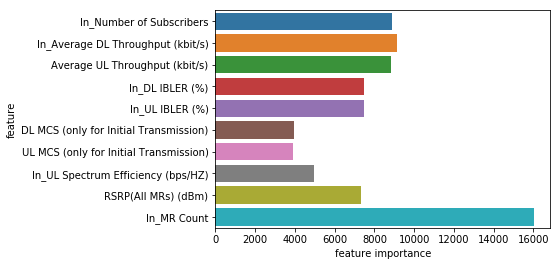

In [67]:
_ = sns.barplot(x='feature importance',y='feature',data=feat_imp_df)

# using randomforrest regressor

In [67]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 2000)

/Users/witchapong/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [68]:
rf.fit(X1_train,y1_train)
y_pred=rf.predict(X1_test)
r2_score(y1_test,y1_pred)

/Users/witchapong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.6896531911944062

# checking the error from the predictor

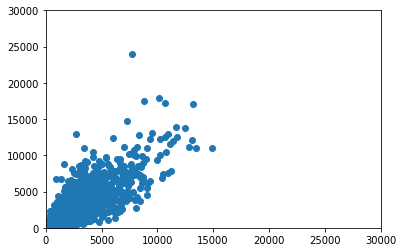

In [68]:
_ = plt.scatter(scy1.inverse_transform(y1_pred),scy1.inverse_transform(y1_test))
_ = plt.xlim([0,30000])
_ = plt.ylim([0,30000])

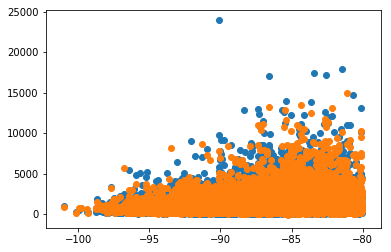

In [70]:
_ = plt.scatter(scX1.inverse_transform(X1_test)[:,8],scy1.inverse_transform(y1_test))
_ = plt.scatter(scX1.inverse_transform(X1_test)[:,8],scy1.inverse_transform(y1_pred))

Testing the model for cluster 1

In [10]:
df1_inv = inv_log_tran(df1.copy())
df1_inv[df1_inv['RSRP(All MRs) (dBm)']<-95].sort_values('Total Traffic Volume (MB)').head(20)

,Number of Subscribers,Average DL Throughput (kbit/s),Average UL Throughput (kbit/s),DL IBLER (%),UL IBLER (%),DL MCS (only for Initial Transmission),UL MCS (only for Initial Transmission),UL Spectrum Efficiency (bps/HZ),RSRP(All MRs) (dBm),MR Count,Total Traffic Volume (MB)
531,11.0,5359.582,3658.216,21.80,10.66,12.0,26.0,0.97,-96.35,108.0,34.273
847,19.0,4324.199,4763.304,16.79,5.64,8.0,24.0,0.69,-95.80,441.0,58.917
986,118.0,7340.705,4257.409,13.68,9.01,10.0,23.0,0.55,-95.61,329.0,81.084
498,33.0,5416.530,3301.810,16.00,6.76,8.0,25.0,1.53,-96.40,166.0,85.813
1360,112.0,6933.223,4360.128,13.19,6.57,10.0,25.0,0.46,-95.20,434.0,90.645
425,60.0,6080.990,4309.131,13.25,7.70,10.0,24.0,0.68,-96.56,398.0,93.071
297,79.0,7428.619,4059.814,15.43,10.26,10.0,23.0,0.62,-96.93,678.0,93.116
802,46.0,6626.288,5090.179,13.68,8.02,12.0,25.0,0.56,-95.86,202.0,94.329
1257,16.0,6764.204,4430.617,22.74,15.11,10.0,25.0,0.57,-95.31,331.0,99.215
103,86.0,6916.596,4574.108,12.62,5.74,10.0,23.0,0.60,-97.89,396.0,103.601


In [16]:
df1_inv[df1_inv['Number of Subscribers']>100].sort_values('Total Traffic Volume (MB)',ascending=False).head(20)

,Number of Subscribers,Average DL Throughput (kbit/s),Average UL Throughput (kbit/s),DL IBLER (%),UL IBLER (%),DL MCS (only for Initial Transmission),UL MCS (only for Initial Transmission),UL Spectrum Efficiency (bps/HZ),RSRP(All MRs) (dBm),MR Count,Total Traffic Volume (MB)
16742,459.0,4377.089,4490.687,12.97,12.17,7.0,25.0,0.58,-90.13,17735.0,23928.848
53645,654.0,6232.377,3080.282,13.91,11.16,13.0,25.0,0.57,-81.10,59925.0,21209.121
41803,1917.0,7086.402,4009.514,15.02,8.58,11.0,25.0,0.65,-85.42,38318.0,20876.144
74,2862.0,3557.090,3404.216,15.10,15.96,8.0,23.0,0.71,-98.07,2505.0,20854.914
2997,791.0,8826.320,3780.870,11.71,9.69,16.0,25.0,0.59,-94.03,2050.0,20693.612
51693,576.0,6091.206,4863.674,10.98,8.93,8.0,26.0,0.77,-82.36,47572.0,19447.747
7857,361.0,13499.238,3990.720,10.66,8.25,11.0,23.0,0.68,-92.17,3844.0,19324.391
41378,157.0,6485.556,4148.822,15.41,10.88,10.0,25.0,0.66,-85.51,43990.0,18996.178
54566,1316.0,7986.186,4280.073,13.70,10.53,10.0,26.0,0.70,-80.19,34690.0,18754.903
53184,113.0,5312.599,4059.972,14.20,6.14,9.0,26.0,0.80,-81.47,26302.0,17916.749


In [34]:
def get_log_col(df,log_col_lst):
    col_loc = []
    for col in log_col_lst:
        col_loc.append(df.columns.get_loc(col))
    return col_loc

def log_tran_mat(mat,idx):
    mat2=mat.copy()
    for i in idx:
        mat2[i] = np.log(mat2[i])
    return mat2

def inv_log_tran_mat(mat,idx):
    mat2=mat.copy()
    for i in idx:
        mat2[i] = np.e**(mat2[i])
    return mat2

In [14]:
log_col_loc = get_log_col(df1_inv,log_tran_col)
log_col_loc

[0, 1, 3, 4, 7, 9]

In [15]:
features_org = df1_inv.columns[:-1]

adjust other features after log transform

In [49]:
index=np.random.randint(df1_inv.shape[0])
sample_grid_0 = df1_inv.loc[index][:-1].copy().values #for recording orginal array
sample_grid_1 = df1_inv.loc[index][:-1].copy().values #for recording modified array

print('original param:')
for i in range(len(features_org)):
    print(features_org[i],sample_grid_0[i])
print('real traffic:{} MB'.format(df1_inv.loc[index][-1]))

inc_rsrp = 10
# rsrp level
sample_grid_1[8] += inc_rsrp
print('\nrsrp increase: ',inc_rsrp)

# record rsrp in scaled domain
sample_grid_0_lg = log_tran_mat(sample_grid_0,log_col_loc)
sample_grid_1_lg = log_tran_mat(sample_grid_1,log_col_loc)
#print('sample_grid_0_lg:\n',sample_grid_0_lg)
#print('sample_grid_1_lg:\n',sample_grid_1_lg)

sample_grid_0_sc = scX1.transform(sample_grid_0_lg.reshape(1,-1))
sample_grid_1_sc = scX1.transform(sample_grid_1_lg.reshape(1,-1))

diff_rsrp_sc = sample_grid_1_sc[0,8] - sample_grid_0_sc[0,8]

#print('rsrp diff in scaled domain: ',diff_rsrp_sc)

# adjust other features according to correlation coef
# mean dl tp
sample_grid_1_sc[0,1] += diff_rsrp_sc*0.186
# mean ul tp
sample_grid_1_sc[0,2] += diff_rsrp_sc*0.083
# dl ibler
sample_grid_1_sc[0,3] += diff_rsrp_sc*(-0.025)
# ul ibler
sample_grid_1_sc[0,4] += diff_rsrp_sc*(-0.117)
# dl mcs
sample_grid_1_sc[0,5] += diff_rsrp_sc*(0.186)
# ul mcs
sample_grid_1_sc[0,6] += diff_rsrp_sc*(0.198)
# ul se
sample_grid_1_sc[0,7] += diff_rsrp_sc*(0.033)
# mr count
sample_grid_1_sc[0,9] += diff_rsrp_sc*(0.34)

# inverse transform the features to show the predicted parameter in the original domain
sample_grid_1 = inv_log_tran_mat(scX1.inverse_transform(sample_grid_1_sc).reshape(-1,),log_col_loc)

print('\npredicted parameters:')
for i in range(len(features_org)):
    print(features_org[i],sample_grid_1[i])
    
pred_traf = scy1.inverse_transform(best_regressor.predict(sample_grid_1_sc))
print('predicted traffic:{} MB '.format(pred_traf[0]))

original param:
Number of Subscribers 607.9999999999999
Average DL Throughput (kbit/s) 6131.775999999999
Average UL Throughput (kbit/s) 4361.554
DL IBLER (%) 14.549999999999992
UL IBLER (%) 7.049999999999998
DL MCS (only for Initial Transmission) 10.0
UL MCS (only for Initial Transmission) 24.0
UL Spectrum Efficiency (bps/HZ) 0.64
RSRP(All MRs) (dBm) -89.0
MR Count 7261.999999999994
real traffic:5186.567 MB

rsrp increase:  10

predicted parameters:
Number of Subscribers 607.9999999999999
Average DL Throughput (kbit/s) 6803.050137821466
Average UL Throughput (kbit/s) 4501.542502022643
DL IBLER (%) 14.443081646253644
UL IBLER (%) 6.449703700446801
DL MCS (only for Initial Transmission) 10.771758307741397
UL MCS (only for Initial Transmission) 24.754846513044182
UL Spectrum Efficiency (bps/HZ) 0.6525732533610346
RSRP(All MRs) (dBm) -79.0
MR Count 17595.939564879664
predicted traffic:6274.864333849928 MB 


# Reduce features in the model

check relation btw the remain features and the target

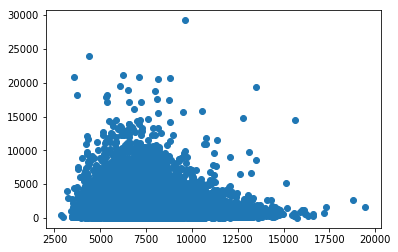

In [8]:
# dl TP x traffic volume
_= plt.scatter(np.e**df1['ln_Average DL Throughput (kbit/s)'],df1['Total Traffic Volume (MB)'])

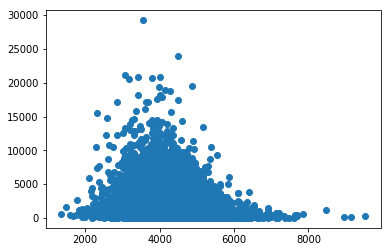

In [9]:
# dl TP x traffic volume
_= plt.scatter(df1['Average UL Throughput (kbit/s)'],df1['Total Traffic Volume (MB)'])

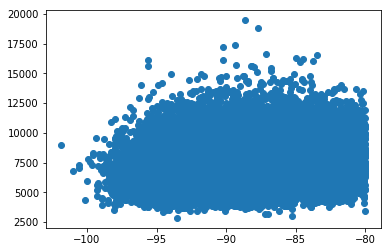

In [15]:
# dl TP x RSRP
_= plt.scatter(df1['RSRP(All MRs) (dBm)'],np.e**df1['ln_Average DL Throughput (kbit/s)'])

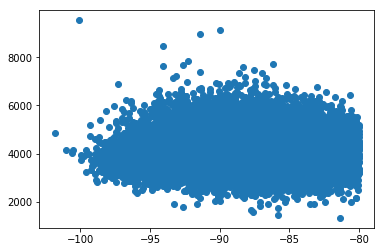

In [40]:
# ul TP x RSRP
_= plt.scatter(df1['RSRP(All MRs) (dBm)'],df1['Average UL Throughput (kbit/s)'])

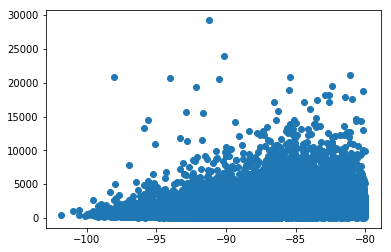

In [16]:
# RSRP x traffic
_= plt.scatter(df1['RSRP(All MRs) (dBm)'],df1['Total Traffic Volume (MB)'])

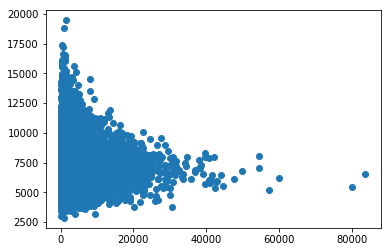

In [18]:
# MR x TP
_= plt.scatter(np.e**df1['ln_MR Count'],np.e**df1['ln_Average DL Throughput (kbit/s)'])

In [17]:
df1.columns

Index(['ln_Number of Subscribers', 'ln_Average DL Throughput (kbit/s)',
       'Average UL Throughput (kbit/s)', 'ln_DL IBLER (%)', 'ln_UL IBLER (%)',
       'DL MCS (only for Initial Transmission)',
       'UL MCS (only for Initial Transmission)',
       'ln_UL Spectrum Efficiency (bps/HZ)', 'RSRP(All MRs) (dBm)',
       'ln_MR Count', 'Total Traffic Volume (MB)'],
      dtype='object')

In [37]:
# train cluster id 1

# split train test data
from sklearn.cross_validation import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler
X1 = df1.loc[:,['ln_Number of Subscribers','ln_MR Count','ln_Average DL Throughput (kbit/s)','Average UL Throughput (kbit/s)','RSRP(All MRs) (dBm)']].values
y1 = df1.iloc[:,-1].values
scX1 = StandardScaler()
scy1 = StandardScaler()
X1 = scX1.fit_transform(X1)
y1 = scy1.fit_transform(y1.reshape(-1,1))

# split data
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3, random_state=42)

In [35]:
import lightgbm as lgb

In [38]:
model_lgb = lgb.LGBMRegressor(learning_rate=0.01,n_estimators=2000,num_leaves=100)
model_lgb.fit(X1_train,y1_train)
y1_pred = model_lgb.predict(X1_test)
r2_score(y1_test,y1_pred)

0.5929054313461792

creating polynomial features

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
# make polynomial features
poly_maker = PolynomialFeatures(3)
X1_poly = poly_maker.fit_transform(X1)

# scale the feature
scX1_poly = StandardScaler()
X1_poly = scX1_poly.fit_transform(X1_poly)

# split data
X1_poly_train,X1_poly_test,y1_poly_train,y1_poly_test=train_test_split(X1_poly,y1,test_size=0.3, random_state=42)

In [43]:
model_lgb = lgb.LGBMRegressor(learning_rate=0.01,n_estimators=2000,num_leaves=100)
model_lgb.fit(X1_poly_train,y1_poly_train)
y1_poly_pred = model_lgb.predict(X1_poly_test)
r2_score(y1_poly_test,y1_poly_pred)

0.5987129049043517

Model tuning for less feature model

In [22]:
# building model directly from lgbm regressor
model_lgb = lgb.LGBMRegressor(n_estimators=2000)

# building model from the general lgb class ---> to define early stopping round the general lgb should be use
# by defining early stopping round in lgb.train()
d_train = lgb.Dataset(X1_train,label=y1_test)
'''
boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100,
subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001,
min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0,
random_state=None, n_jobs=-1, silent=True, **kwargs
'''

"\nboosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100,\nsubsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001,\nmin_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0,\nrandom_state=None, n_jobs=-1, silent=True, **kwargs\n"